# ASSIGNMENT 2
## Submission Deadline: 03/11/21, 2100 Hrs
## Submission Link: [https://forms.gle/wnUyJjhhbcFKdTGX8](https://forms.gle/wnUyJjhhbcFKdTGX8)

Name: **Shiven Tripathi**

Roll No.: **190816**

IITK EMail: **shiven@iitk.ac.in**

**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), an image folder, and Env folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Env folder is the environment implementation provided by us (DO NOT change it) and image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via following Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
- **DO NOT Forget to write name, roll no and email details above**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

# Random Maze Environment

<b><center>Maze Environment</center></b> | <b><center>Maze Environment Transitions</center></b>
--- | ---
<img src="image/maze_env.png" style="height:300px"> | <img src="image/maze_env_transitions.png" style="height:300px">

In this assignment we will be exploring a variant of the Random Maze Environment (RME) that we have been looking in the lectures. The environment is represented as a grid world in Figure 1a. Random maze environment is a highly stochastic environment with 11 states: two terminal states (a goal state (G) and a hole state (H)) and 9 non-terminal states and a wall in between the environment. The wall behaves similar to the wall on the periphery of the environment, basically if an agent bumps against the wall, it bounces back. The boundary of the environment behaves similarly, if an agent hits the boundary it bounces back. The agent receives a reward of +1 when it lands in the goal state (3) and it receives a reward of -1 when it lands in the hole state (7). For rest of the transitions there is a reward of -0.04. Essentially the agent has the living cost of -0.04. The transitions are stochastic as shown in Figure 1b. In this environment, four actions are possible: left, top, right, and bottom. For every intended action, there is 80% chance of going in the intended direction and remaining 20% chances of going in either of the orthogonal directions. The 20% chance gets equally distributed between each of the orthogonal direction. The agent starts from state 8 (S). Assume γ = 0.99 for the problems below.

In this assignment we will be looking at control algorithms we learnt in Lecture 10 and 11. For each of the plot, create the legend on the left/right side so that it doesn't overlay on the plot. For all the algorithms below, this time we will not be specifying the hyper-parameters, please play with the hyper-params to come up with the best values. This way you will learn to tune the model. As you are aware from your past experience, single run of the algorithm over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy.

In [1]:
# Environment setup
!pip install --editable Environments

Obtaining file:///C:/Users/shive/OneDrive/Desktop/Sem%205/CS698/CS698-Deep-Reinforcement-Learning/ASSIGN-2/assignment_2/Environments
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: environments
    Found existing installation: environments 1.0.0
    Uninstalling environments-1.0.0:
      Successfully uninstalled environments-1.0.0
  Running setup.py develop for environments


### <span style="color:red">Restart the kernel.</span>

In [54]:
# all imports go in here
import gym
import numpy as np
import matplotlib.pyplot as plt

In [55]:
from tqdm import tqdm

In [56]:
# Create environment
env = gym.make('environments:random_maze-v0')

The environment can be interacted with via standard functions, reset() and step(). The environment uses the following structure.

#### States: 
        0        1        2         3(Goal)
        4        5(Wall)  6         7(Hole)
        8(Start) 9        10        11
#### Action space:
        0 -> LEFT
        1 -> UP
        2 -> RIGHT
        3 -> DOWN
#### Rewards:
        If Goal state: +1
        If Hole state: -1
        Otherwise: -0.04
#### Step() returns:
        state,       reward,            is_Terminal
        Next state   Reward received    Whether next state is a terminal state

### All your hyperparameters should be defined here. We will change their value here and your code should work  accordingly.

In [141]:
def plot(state_value, q_value):
    TOTAL_EPISODES = q_value.shape[0]
    TOTAL_STATES = q_value.shape[1]
    TOTAL_ACTIONS = q_value.shape[2]

    # found by value iteration
    true_value = [0.82442985, 0.89286374, 0.95464233, 0.0, 0.76427487, 0.,
 0.68820946, 0.0, 0.69763948, 0.63906542, 0.60613373, 0.38186228]
        
    fig, ax = plt.subplots(nrows=3, ncols=4)
    fig.set_figheight(15)
    fig.set_figwidth(20)
    fig.suptitle('State-Value Function vs Epsisodes')
    for row in range(3):
        for col in range(4):
            state = row*4 + col
            ax[row,col].set_title('State: {}'.format(state))
            ax[row,col].plot(np.arange(TOTAL_EPISODES), state_value[:, state])
            ax[row,col].plot(np.arange(TOTAL_EPISODES), true_value[state]*np.ones(TOTAL_EPISODES))
    plt.show()            

    fig, ax = plt.subplots(nrows=3, ncols=4)
    fig.set_figheight(15)
    fig.set_figwidth(20)
    fig.suptitle('Q Value Function for actions vs Epsisodes')
    for row in range(3):
        for col in range(4):
            state = row*4 + col
            ax[row,col].set_title('State: {}'.format(state))
            for action in range(TOTAL_ACTIONS):
                ax[row,col].plot(np.arange(TOTAL_EPISODES), q_value[:, state, action], label='Action: {}'.format(action))
                ax[row,col].plot(np.arange(TOTAL_EPISODES), true_value[state]*np.ones(TOTAL_EPISODES))

    plt.legend()
    plt.show()

def plotValueFunction(state_value):
    fig, ax = plt.subplots()
    fig.suptitle('Final State-Value Function')
    ax.matshow(np.reshape(state_value[-1], (3,4)), cmap='gray')
    for i in range(3):
        for j in range(4):
            ax.text(j, i, np.round(np.reshape(state_value[-1], (3,4))[i][j],3), va='center', ha='center', color='green', size='xx-large')
    plt.show()

def plotPolicy(policy):
    fig, ax = plt.subplots()
    fig.suptitle('Policy Function')
    maze = np.zeros(12)
    maze[3] = 1
    maze[7] = -1
    maze[5] = 0.5
    ax.matshow(np.reshape(maze, (3,4)))
    for i in range(3):
        for j in range(4):
            state = i*4 + j
            if policy[state] == 0:
                ax.text(j, i, '←', va='center', ha='center', color='red', size='xx-large')
            elif policy[state] == 1:
                ax.text(j, i,  '↑', va='center', ha='center', color='red', size='xx-large')
            elif policy[state] == 2:
                ax.text(j, i, '→', va='center', ha='center', color='red', size='xx-large')
            elif policy[state] == 3:
                ax.text(j, i, '↓', va='center', ha='center', color='red', size='xx-large')
    plt.show()

In [168]:
def decayLearningRate(alpha, e, noEpisodes, alpha_final=0.01):
    # exponentially decay alpha to alpha_final in noEpisodes
    # if e+1 >= noEpisodes/2:
    #     return alpha_final
    return alpha*(alpha_final/alpha)**((e+1)/noEpisodes)

def decayEpsilon(epsilon, e, noEpisodes, epsilon_final=0.1, decay='linear'):
    # exponentially decay epsilon to epsilon_final in noEpisodes
    if decay == 'exp':
        # if e+1 >= noEpisodes/2:
        #     return epsilon_final
        return epsilon*(epsilon_final/epsilon)**((e+1)*2/noEpisodes)
    else:
        # if e+1 >= noEpisodes/2:
        #     return epsilon_final
        return epsilon + e*(epsilon_final-epsilon)/(noEpisodes-1)

def generateTrajectory(env, Q, epsilon, maxSteps):
    # generate a trajectory in the environment using an epsilon greedy strategy for the Q-function
    s, terminal = env.reset()
    trajectory = []
    for step in range(maxSteps):
        s = env.state
        if np.random.rand() < epsilon:
            a = np.random.randint(len(env.transition_matrix[s]))
        else:
            a = np.argmax(Q[s])
        s_, r, terminal, _ = env.step(a)
        trajectory.append((s, a, r, s_))
        if terminal:
            break
    return trajectory

def GreedyPolicy(Q):
    # return a greedy policy for the given Q-function
    policy = np.zeros(len(Q))
    for s in range(len(Q)):
        policy[s] = np.argmax(Q[s])
    return policy

Converged in: 38 iterations
Value Function: [0.82442985 0.89286374 0.95464233 0.         0.76427487 0.
 0.68820946 0.         0.69763948 0.63906542 0.60613373 0.38186228]


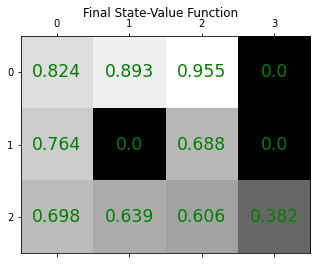

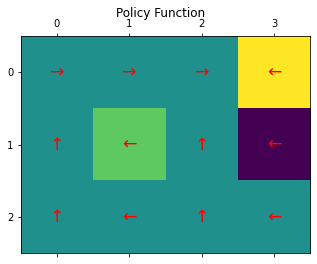

In [169]:
def valueIteration(env, gamma=0.99, theta=10**-2):
    # return the optimal state-value function for the given environment and parameters using value iteration
    
    v = np.zeros(len(env.transition_matrix.keys())+1)
    pi = np.zeros(len(env.transition_matrix.keys())+1)
    env.reset()
    iterations = 0
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    while True:
        iterations += 1
        Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
        for state in env.transition_matrix.keys():
            for action in env.transition_matrix[state].keys():
                for p,next_state,reward,terminal in env.transition_matrix[state][action]:
                        Q[state][action] += p * (reward + gamma * v[next_state])
        if max(np.abs(v-np.max(Q,axis=1))) < theta:
            print("Converged in:", iterations, "iterations")
            break
        v = np.max(Q, axis=1)
    pi = GreedyPolicy(Q)
    return v,pi

v,pi = valueIteration(env, gamma=0.99, theta=10**-10)
print("Value Function:", v)
plotValueFunction([v])
plotPolicy(pi)

## Problem 1: Monte Carlo Control
(40+20+20+5+5+5+5=100 points)

Implement the Monte Carlo Control for the Random Maze Environment (RME) described above. In particular, you need to implement First Visit Monte Carlo Control (FMVCC) for finding the optimal policy for RME. Use the function definition (given below) as given in Lecture 10, slide 19.

`MonteCarloControl(env, γ, α0, ϵ0, maxSteps, noEpisodes, firstVisit = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of State-value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [170]:
def experimenter(instances, method, average=True,**kwargs):
    # function to run multiple experiments for different seeds and return the average results 
    seeds = np.arange(instances)
    
    STATE_VALUE = []
    Q_VALUE = []
    OPTIMAL_POLICY = []

    for i in tqdm(range(instances)):
        env = gym.make('environments:random_maze-v0')
        env.seed(seeds[i])
        state_value, q_value, optimal_policy = method(env, **kwargs)
        STATE_VALUE.append(state_value)
        Q_VALUE.append(q_value)
        OPTIMAL_POLICY.append(optimal_policy)
    if average:
        STATE_VALUE = np.mean(STATE_VALUE, axis=0)
        Q_VALUE = np.mean(Q_VALUE, axis=0)
        OPTIMAL_POLICY = GreedyPolicy(Q_VALUE[-1])
    return STATE_VALUE, Q_VALUE, OPTIMAL_POLICY

In [171]:
# First Visit Monte Carlo Control (FMVCC)
def monte_carlo_control(env, gamma, alpha, epsilon, maxSteps, noEpisodes, firstVisit = True):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        t = generateTrajectory(env, Q, epsilon_e, maxSteps)
        visited = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

        for i, (s,a,r, s_) in enumerate(t):
            if visited[s][a] and firstVisit:
                continue
            visited[s][a] = 1
            G = 0
            for j in range(i, len(t)):
                G += gamma**(j-i) * t[j][2]
            Q[s][a] = Q[s][a] + alpha_e * (G - Q[s][a])
        Q_est[e] = Q
    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


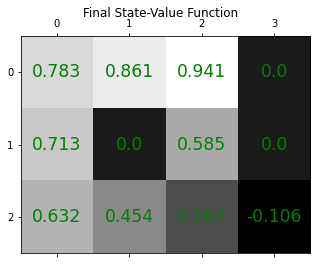

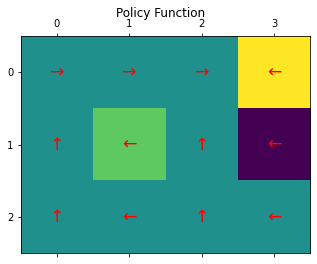

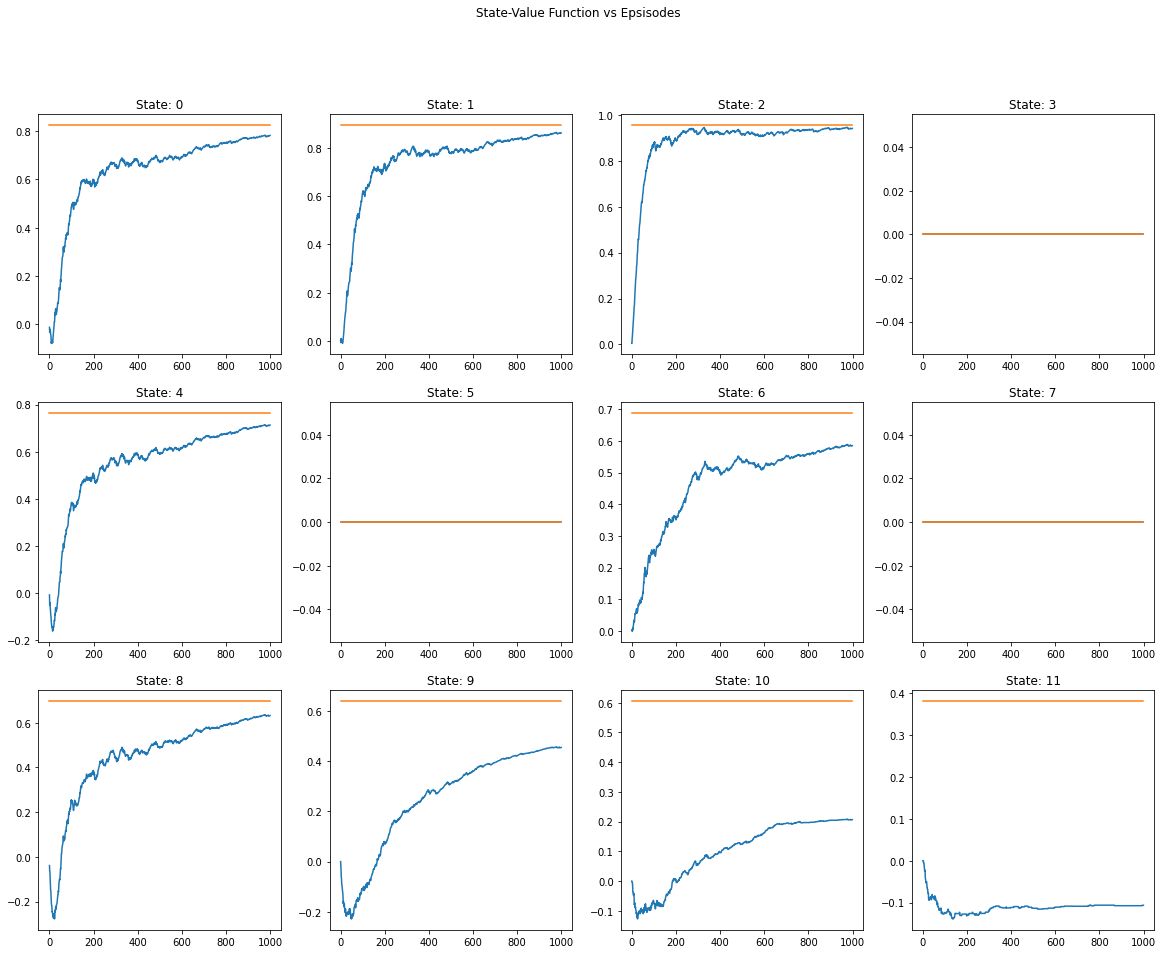

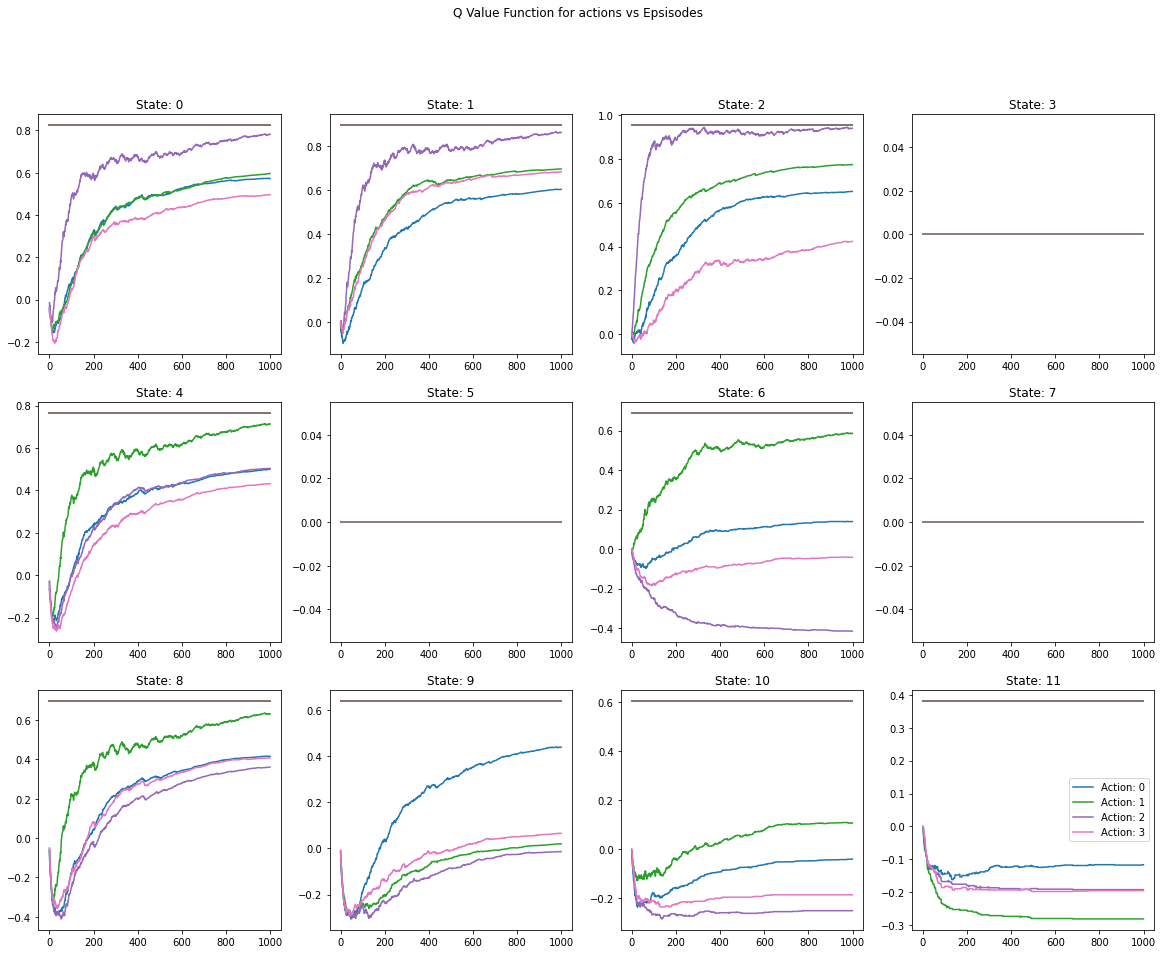

In [182]:
gamma = 0.99
alpha = 0.05
epsilon = 0.5
maxSteps = 50
noEpisodes = 1000
firstVisit = True

state_value, q_value, optimal_policy = experimenter(instances=10, method=monte_carlo_control, average=True, gamma=gamma, alpha=alpha, epsilon=epsilon, maxSteps=maxSteps, noEpisodes=noEpisodes, firstVisit=firstVisit)

plotValueFunction(state_value)
plotPolicy(optimal_policy)
plot(state_value, q_value)

### Seeds and Averaging

a. 10 Instances of the environment with different seeds were used for averaging. The seeds are ```np.arange(10)```

b. The hyperparameters are available in the codeblock used to run the experiment

### Hyperparameter Tuning

a. High alpha (>0.2) resulted in higher variance in the plots, and reduced convergence to true estimates

b. Low epsilon (<0.4) resulted in higher bias due to lesser states being explored and updated. This problem was in particular more severe for states not reached often like state 10 and 11

c. Number of epsiodes was increased to to 1000 till convergence was achieved. States in the first row attained convergence much sooner, but improvements for other states in the third row were not seen even on increasing number of episodes

d. For very high epsilon values policy convergence for state 10 is not achieved always. This is intuitive because in high randomness the up action which is optimal might not give good returns always since it also directs towards hole state, making left action also worthwhile.

### Observations

a. High bias for states in the third row, while the initial states reach true values

b. High variance in the plots can be seen as expected from Monte Carlo methods which do not update until entire trajectory is exhausted

c. Convergence to ideal policy can be seen. This is quite robust unlike the state values which drastically changes on changing hyperparameters

d. As we expect for terminal states, the state value function returns a zero, providing a sanity check for the implementation

e. Convergence is much slower for Monte Carlo methods unlike other implementations which reach true values much quicker

## Problem 2: SARSA (TD Control)
(40+20+20+5+5+5+5=100 points)

Implement the SARSA algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slide 22.

`SARSA(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of State-value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [144]:
def actionSelect(s, Q, epsilon):
    # select an action using epsilon greedy strategy
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q[s]))
    else:
        return np.argmax(Q[s])

In [145]:
# SARSA
def sarsa(env, gamma, alpha, epsilon, noEpisodes):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        s, terminal = env.reset()
        a = actionSelect(s, Q, epsilon_e)
        terminal = False
        while not terminal:
            s_, r, terminal, _ = env.step(a)
            a_ = actionSelect(s_, Q, epsilon_e)
            td_target = r
            if not terminal:
                td_target += gamma * Q[s_][a_]
            td_error = td_target - Q[s][a]
            Q[s][a] += alpha_e*td_error
            s = s_
            a = a_
        Q_est[e] = Q
    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

100%|██████████| 10/10 [00:15<00:00,  1.53s/it]


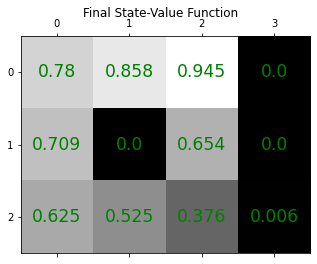

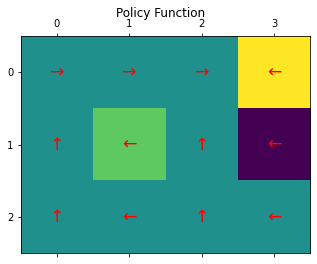

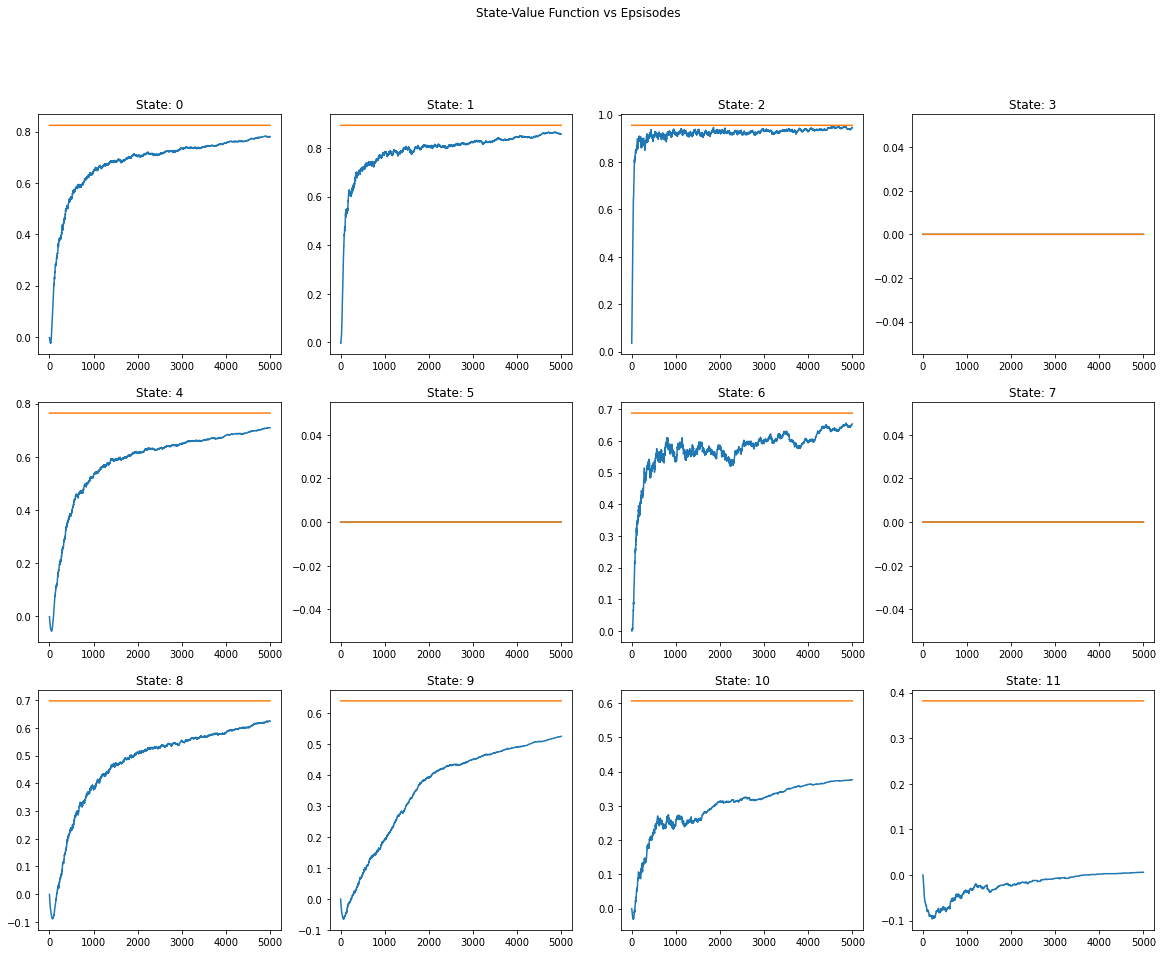

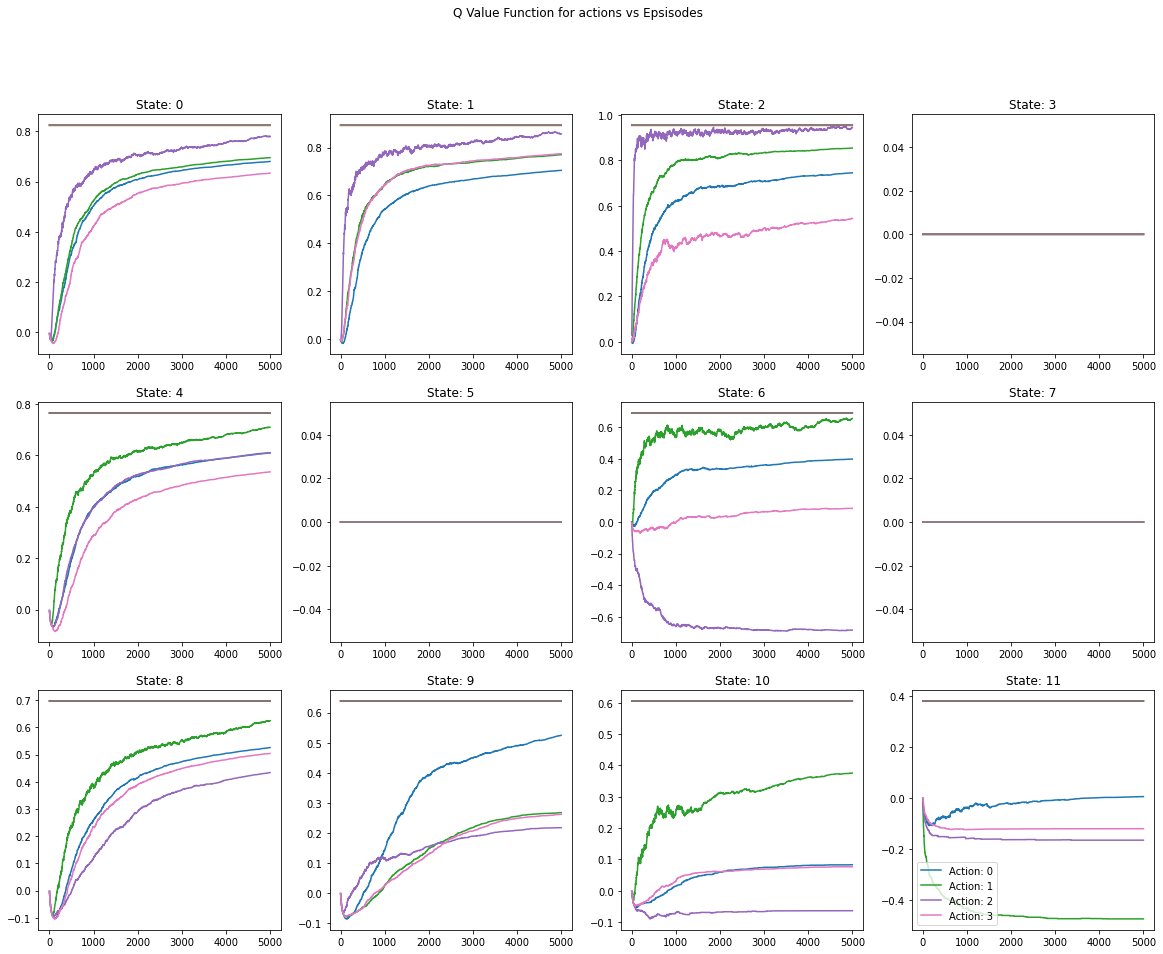

In [197]:
gamma = 0.99
alpha = 0.05
epsilon = 0.4
maxSteps = 50
noEpisodes = 5000

state_value, q_value, optimal_policy = experimenter(10, sarsa, gamma=gamma, alpha=alpha, epsilon=epsilon, noEpisodes=noEpisodes)

plotValueFunction(state_value)
plotPolicy(optimal_policy)
plot(state_value, q_value)

### Seeds and Averaging

a. 10 Instances of the environment with different seeds were used for averaging. The seeds are ```np.arange(10)```

b. The hyperparameters are available in the codeblock used to run the experiment

### Hyperparameter Tuning
    
a. High alpha (>0.2) resulted in higher variance in the plots, and reduced convergence to true estimates

b. Low epsilon (<0.4) resulted in higher bias due to lesser states being explored and updated. This problem was in particular more severe for states not reached often like state 10 and 11

c. Number of epsiodes was increased to to 1000 till convergence was achieved. States in the first row attained convergence much sooner, but improvements for other states in the third row were not seen even on increasing number of episodes

d. For very high epsilon values policy convergence for state 10 is not achieved always. This is intuitive because in high randomness the up action which is optimal might not give good returns always since it also directs towards hole state, making left action also worthwhile.

### Observations
    
a. High bias for states in the third row, while the initial states reach true values

b. Significantly lower variance can be seen in the SARSA plots as expected from SARSA methods which updates the value function for each action taken

c. Convergence to ideal policy can be seen. This is quite robust unlike the state values which drastically changes on changing hyperparameters

d. As we expect for terminal states, the state value function returns a zero, providing a sanity check for the implementation

e. Much slower convergence than Monte Carlo methods can be seen since even for 5000 episodes a flatline is not apparent for state values

## Problem 3: Q-Learning
(40+20+20+5+5+5+5=100 points)

Implement the Q-Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slide 25.

`Q-Learning(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of State-value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [147]:
# Q-Learning
def q_learning(env, gamma, alpha, epsilon, noEpisodes):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        s, terminal = env.reset()
        terminal = False
        while not terminal:
            a = actionSelect(s, Q, epsilon_e)
            s_, r, terminal, _ = env.step(a)
            td_target = r
            if not terminal:
                td_target += gamma * np.max(Q[s_])
            td_error = td_target - Q[s][a]
            Q[s][a] += alpha_e*td_error
            s = s_
        Q_est[e] = Q
    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

100%|██████████| 10/10 [00:05<00:00,  1.86it/s]


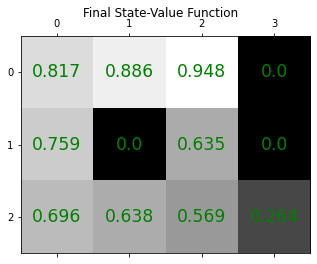

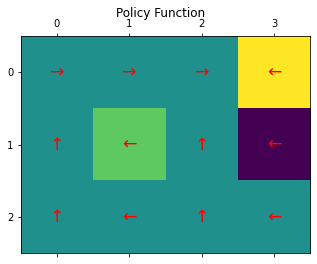

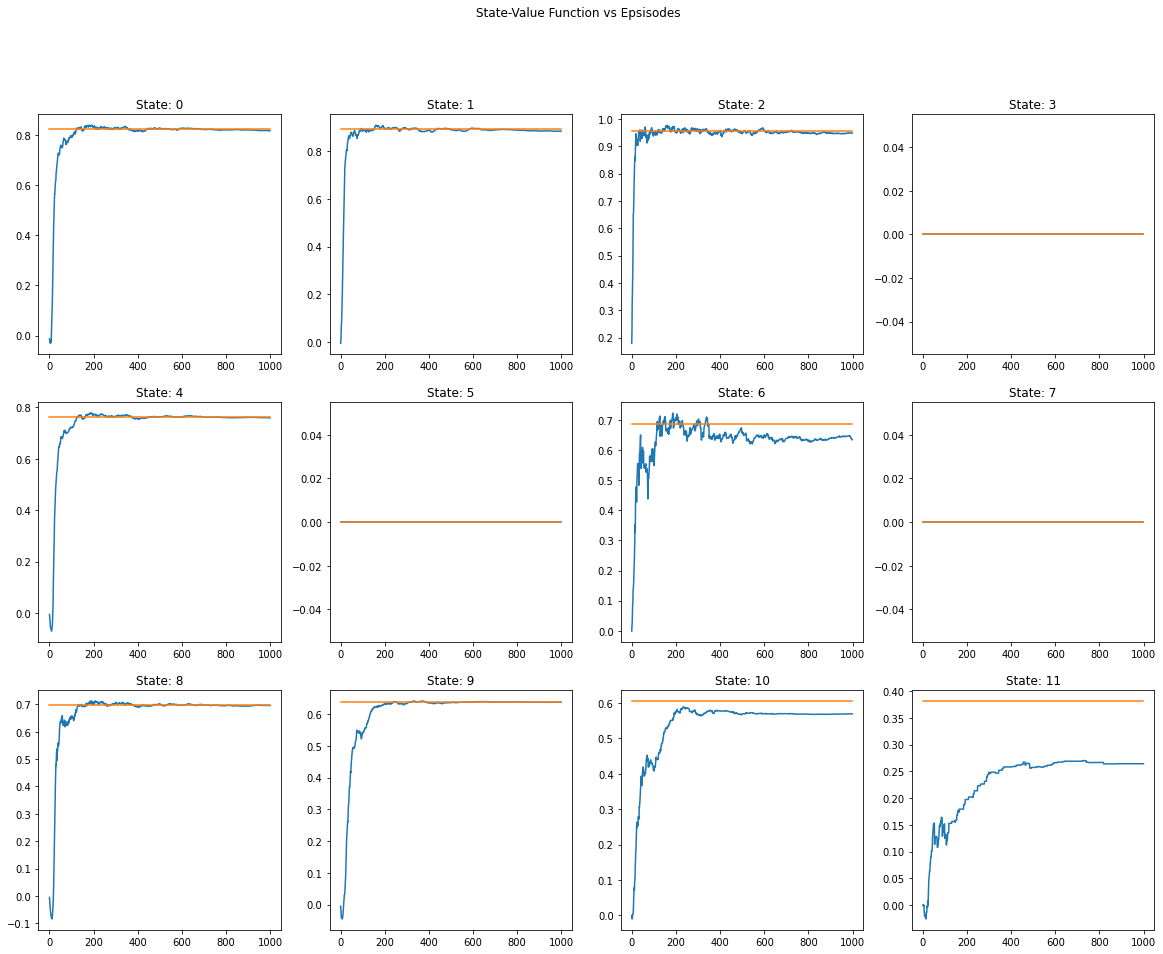

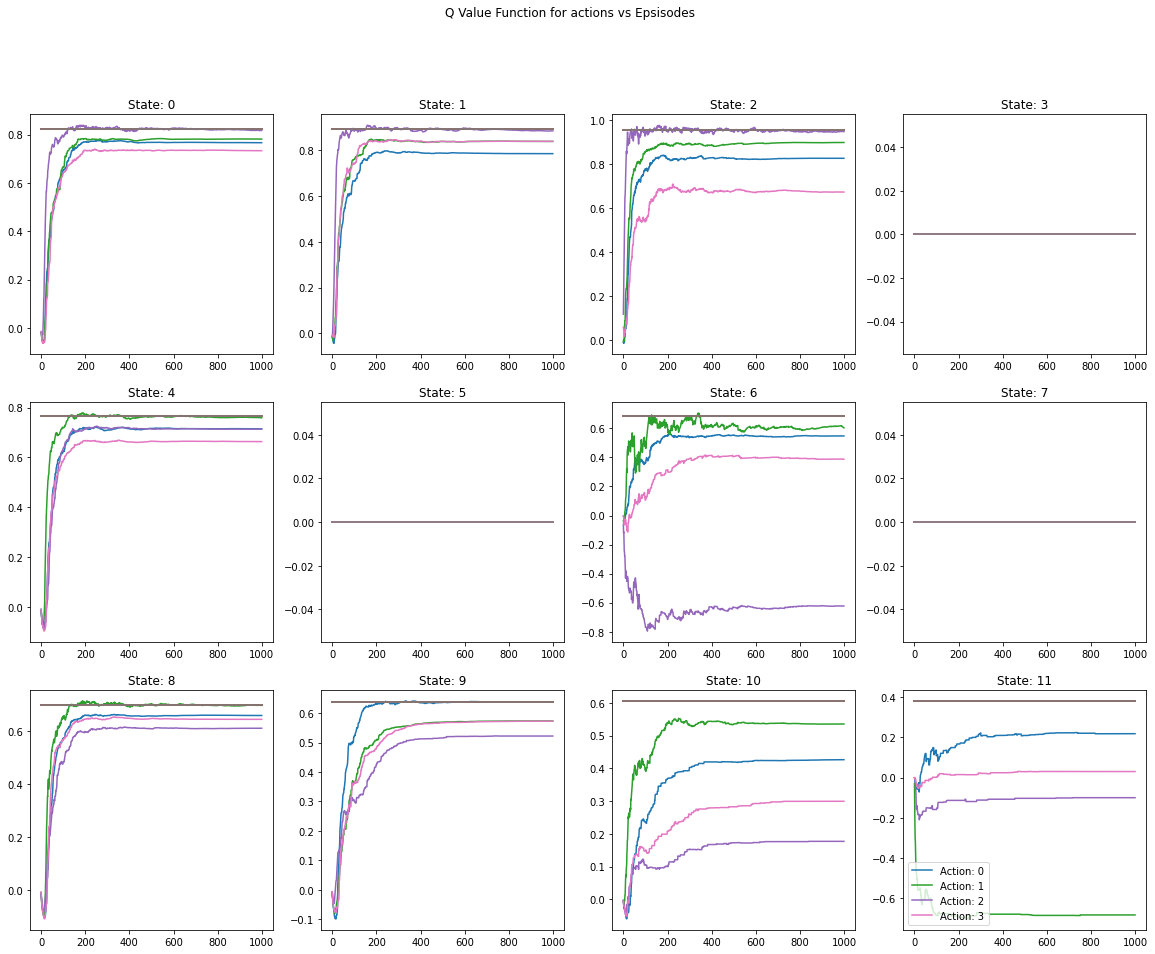

In [200]:
gamma = 0.99
alpha = 0.3
epsilon = 0.5
noEpisodes = 1000

state_value, q_value, optimal_policy = experimenter(10, q_learning, gamma=gamma, alpha=alpha, epsilon=epsilon, noEpisodes=noEpisodes)

plotValueFunction(state_value)
plotPolicy(optimal_policy)
plot(state_value, q_value)

### Seeds and Averaging

a. 10 Instances of the environment with different seeds were used for averaging. The seeds are ```np.arange(10)```

b. The hyperparameters are available in the codeblock used to run the experiment

### Hyperparameter Tuning
    
a. High alpha (>0.6) resulted in higher variance in the plots, and reduced convergence to true estimates

b. Low epsilon (<0.4) resulted in higher bias due to lesser states being explored and updated. This problem was in particular more severe for states not reached often like state 10 and 11

c. Number of epsiodes was increased to to 1000 till convergence was achieved. States in the first row attained convergence much sooner, but improvements for other states in the third row were not seen even on increasing number of episodes.


### Observations
    
a. High bias for states in the third row, while the initial states reach true values

b. Significantly lower variance and lower bias compared to previous implementations. 

c. Convergence to ideal policy can be seen. This is quite robust unlike the state values which drastically changes on changing hyperparameters

d. As we expect for terminal states, the state value function returns a zero, providing a sanity check for the implementation

e. Faster convergence than both Monte Carlo and SARSA methods can be seen 

## Problem 4: Double Q-Learning
(40+20+20+5+5+5+5=100 points)

Implement the Double Q-Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slides 27, 28.

`Double-Q-Learning(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of State-value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [201]:
# Double Q-Learning
def double_q_learning(env, gamma, alpha, epsilon, noEpisodes):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q1 = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q1_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q2 = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q2_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        s, terminal = env.reset()
        terminal = False
        while not terminal:
            a = actionSelect(s, Q, epsilon_e)
            s_, r, terminal, _ = env.step(a)

            if np.random.randint(2):
                a1 = np.random.choice(np.flatnonzero(np.isclose(Q1[s_], np.max(Q1[s_]))))
                td_target = r
                if not terminal:
                    td_target += gamma * Q2[s_][a1]
                td_error = td_target - Q1[s][a]
                Q1[s][a] += alpha_e*td_error
            else:
                a2 = np.random.choice(np.flatnonzero(np.isclose(Q2[s_], np.max(Q2[s_]))))
                td_target = r
                if not terminal:
                    td_target += gamma * Q1[s_][a2]
                td_error = td_target - Q2[s][a]
                Q2[s][a] += alpha_e*td_error
            s = s_
        Q1_est[e] = Q1
        Q2_est[e] = Q2
        Q = (Q1 + Q2)/2
        Q_est[e] = Q

    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

100%|██████████| 5/5 [00:07<00:00,  1.50s/it]


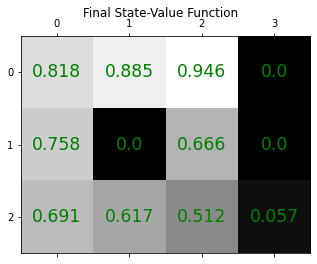

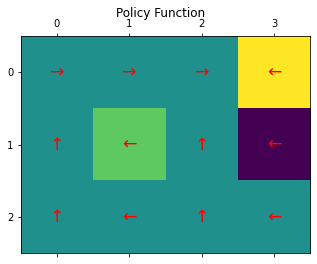

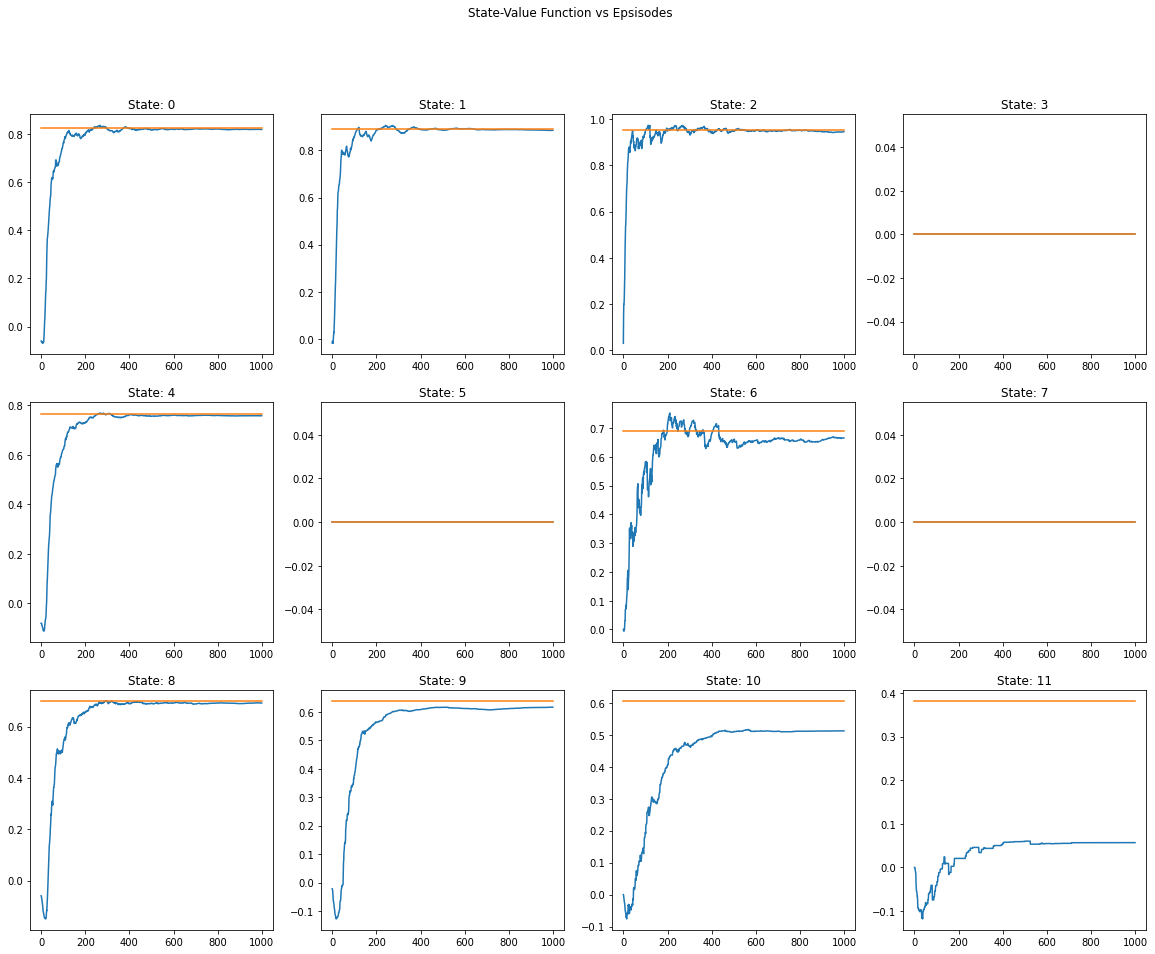

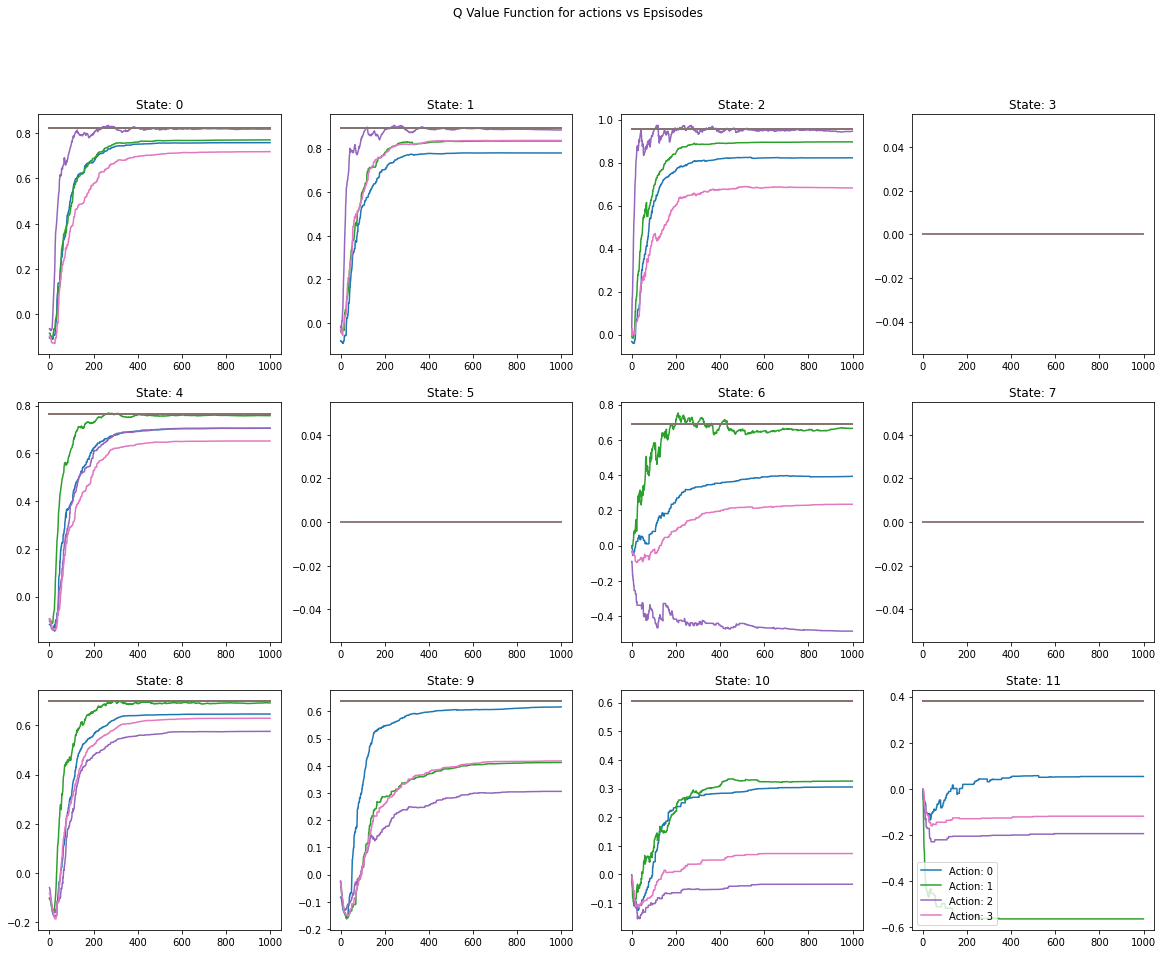

In [217]:
gamma = 0.99
alpha = 0.3
epsilon = 0.5
noEpisodes = 1000

state_value, q_value, optimal_policy = experimenter(5, double_q_learning, gamma=gamma, alpha=alpha, epsilon=epsilon, noEpisodes=noEpisodes)

plotValueFunction(state_value)
plotPolicy(optimal_policy)
plot(state_value, q_value)

### Seeds and Averaging

a. 5 Instances of the environment with different seeds were used for averaging. The seeds are ```np.arange(5)```

b. The hyperparameters are available in the codeblock used to run the experiment

### Hyperparameter Tuning
    
a. High alpha (>0.6) resulted in higher variance in the plots, and reduced convergence to true estimates

b. Low epsilon (<0.4) resulted in higher bias due to lesser states being explored and updated. This problem was in particular more severe for states not reached often like state 10 and 11

c. Number of epsiodes was increased to to 1000 till convergence was achieved. States in the first row attained convergence much sooner, but improvements for other states in the third row were not seen even on increasing number of episodes.


### Observations
    
a. High bias for states in the third row, while the initial states reach true values

b. Significantly lower variance and lower bias compared to previous implementations. The variance is even lower than Q Learning which is expected because of the double Q-Learning implementation which smoothens sudden updates which can happen when using only one set of Q Values

c. Convergence to ideal policy can be seen. This is quite robust unlike the state values which drastically changes on changing hyperparameters

d. As we expect for terminal states, the state value function returns a zero, providing a sanity check for the implementation

e. Fastest convergence can be seen but a higher bias is visible than single Q-Learning

## Problem 5: Comparing Control Algorithms
(20+5+5+5+5+5=40 points)

For FVMCC, SARSA, Q and Double-Q algorithms implemented above, do the following:

(a) For each of the algorithm, in a single plot, plot the evolution of Policy Success Rate (in %) vs Episodes. Policy Success Rate is de

ned as number of times the agent reaches the goal state out of the total number of the episodes run using a specific policy. Basically implement the following function that would return the policy success percentage. As you are training the agent, at each episode, you will have a version of the policy, use that  policy along with the function below to get the policy success rate.

    `def getPolicySuccessRate(env, π_current, goalState, maxEpisodes = 100, maxSteps = 200)`
    
    
    
(b) What are your observations from the Policy Success Rate (in %) plot.

(c) For each of the algorithm (in a single plot), plot the Estimated Expected Return (from the start state) vs Episodes.

(d) What are your observations for the Estimated Expected Return plot?

(e) For each of the algorithm (in a single plot), plot the State-value Function Estimation Error vs Episodes. State-value Function Estimation Error is defined as Mean Absolute Error across all V-function estimates (across all states) from the respective optimal value.

(f) What are your observations for the State-value Function Estimation Error plot?

In [213]:
# run episodes with the policy passed as an argument and compute success rate
def get_policy_success_rate(env, current_policy, goal_state, maxEpisodes = 100, maxSteps = 200):
    n_success = 0
    for e in range(maxEpisodes):
        s, terminal = env.reset()
        for i in range(maxSteps):
            a = current_policy[s]
            s_, r, terminal, _ = env.step(a)
            if s_ == goal_state:
                n_success += 1
                break
            s = s_
    policy_success_rate = n_success/maxEpisodes
    return policy_success_rate

In [218]:
def plot_policy_success_rate_togetherFIRST(instances=5, maxEpisodes=10, maxSteps=50, noEpisodes=250):
    
    env = gym.make('environments:random_maze-v0')
    env.seed(21)
    policy_success_rates = np.zeros((instances, noEpisodes))

    plt.rcParams["figure.figsize"] = (20,5)

    _, q_value, _ = experimenter(instances, sarsa, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Sarsa')

    _, q_value, _ = experimenter(instances, monte_carlo_control, average=False, gamma=0.99, alpha=0.05, epsilon=0.5, maxSteps=50, noEpisodes=noEpisodes, firstVisit=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Monte Carlo Control')

    _, q_value, _ = experimenter(instances, q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Q Learning')

    _, q_value, _ = experimenter(instances, double_q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Double Q Learning')
        
    plt.title('Policy Success Rate vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Policy Success Rate')
    plt.legend()
    plt.show()

100%|██████████| 5/5 [00:35<00:00,  7.17s/it]


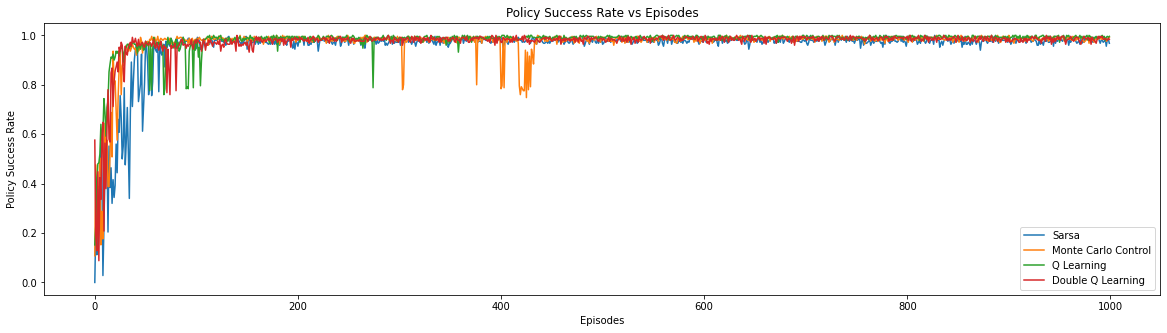

In [219]:
plot_policy_success_rate_togetherFIRST(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=1000)

### Policy Success Comparison

1. For each method, on each training epsiode, we simulate the policy for 50 epsisodes to estimate the success rate
2. Since unlike state values, policy convergence is achieved much faster, we can observe little difference in the success rate for each method after 500 episodes
3. In the initial stages, Double Q Learning is the best and maintains the lead. This can be explained by the least variance it shows in training
4. High bias of Monte Carlo and then SARSA make it difficult for them to learn the ideal policy as quick and therefore they struggle in the initial episodes
5. Overall Double Q Learning shows best success with least variance (since others show random drops in success rate), followed by Q Learning and then SARSA and lastly Monte Carlo method

In [220]:
def get_expected_return(env, current_policy, maxEpisodes = 100, maxSteps = 200, discount=0.99):
    expected_return = 0
    for e in range(maxEpisodes):
        s, terminal = env.reset()
        rewards = []
        for i in range(maxSteps):
            a = current_policy[s]
            s_, r, terminal, _ = env.step(a)
            rewards.append(r)
            if terminal:
                break
            s = s_
        expected_return += np.sum(rewards*np.power(discount, np.arange(len(rewards))))
    return expected_return/maxEpisodes

In [223]:
def plot_expected_return_togetherFIRST(instances=5, maxEpisodes=10, maxSteps=50, noEpisodes=250, discount=0.99):
    
    env = gym.make('environments:random_maze-v0')
    env.seed(21)
    expected_return = np.zeros((instances, noEpisodes))

    plt.rcParams["figure.figsize"] = (20,5)

    _, q_value, _ = experimenter(instances, sarsa, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Sarsa')

    _, q_value, _ = experimenter(instances, monte_carlo_control, average=False, gamma=0.99, alpha=0.05, epsilon=0.5, maxSteps=50, noEpisodes=noEpisodes, firstVisit=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Monte Carlo Control')

    _, q_value, _ = experimenter(instances, q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Q Learning')

    _, q_value, _ = experimenter(instances, double_q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Double Q Learning')
        
    plt.title('Expected Return vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.show()

100%|██████████| 5/5 [00:38<00:00,  7.64s/it]


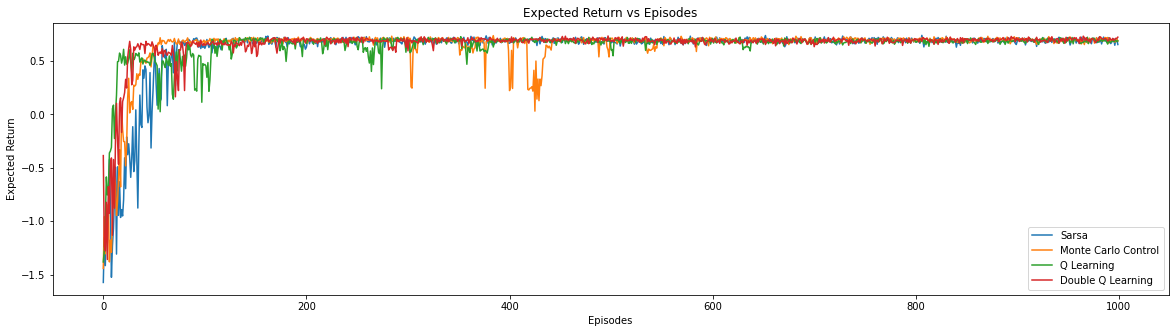

In [224]:
plot_expected_return_togetherFIRST(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=1000, discount=0.99)

### Expected Return Comparison

1. We see similar trends as the policy success rate plot. The difference is that now Q Learning appears to be better with it achieving a higher return much faster than the other methods.
2. Double Q Learning again has the lowest variance of all the methods, and even Q Learning shows random drops in returns due to unstable training compared to Double Q Learning
3. Monte Carlo shows a better bias than SARSA but has a much higher variance as observed from drops in return near 430 episode. Even then this difference in returns is only apparent for the initial episodes and SARSA catches up soon after, while maintaining lower variance (even lower than Q Learning) since it does not show significant falls in returns

In [225]:
def plot_estimate_error_togetherFIRST(instances=10, maxEpisodes=50, maxSteps=50, noEpisodes=250):
    env = gym.make('environments:random_maze-v0')
    env.seed(21)

    plt.rcParams["figure.figsize"] = (20,5)
    estimate_errors = np.zeros((instances, noEpisodes))
    true_estimates = [0.82442985, 0.89286374, 0.95464233, 0.0, 0.76427487, 0.,
 0.68820946, 0.0, 0.69763948, 0.63906542, 0.60613373, 0.38186228]

    state_value, _, _ = experimenter(instances, sarsa, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Sarsa')

    state_value, _, _ = experimenter(instances, monte_carlo_control, average=False, gamma=0.99, alpha=0.05, epsilon=0.5, maxSteps=50, noEpisodes=noEpisodes, firstVisit=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Monte Carlo Control')

    state_value, _, _ = experimenter(instances, q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Q Learning')

    state_value, _, _ = experimenter(instances, double_q_learning, average=False, gamma=0.99, alpha=0.3, epsilon=0.5, noEpisodes=noEpisodes)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Double Q Learning')
        
    plt.title('Estimated Mean State Value Error vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Mean State Value Error')
    plt.legend()
    plt.show()

100%|██████████| 50/50 [00:00<00:00, 100.12it/s]


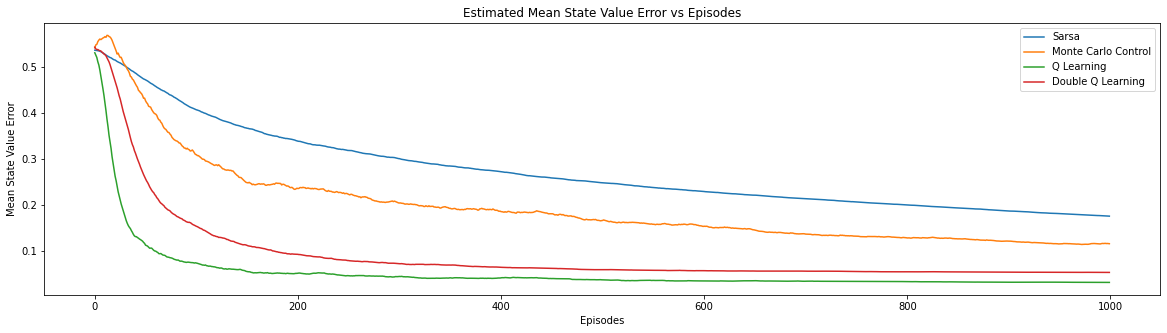

In [226]:
plot_estimate_error_togetherFIRST(instances=50, maxEpisodes=50, maxSteps=50, noEpisodes=1000)

### Mean State Value Error Comparison

## Problem 6: SARSA(λ) Replacing
(40+20+20+5+5+5+5=100 points)

Implement the SARSA(λ) algorithm with Replacing Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 29, 30.

`SARSA-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of State-value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [227]:
# SARSA-lambda Replacing
def sarsa_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        E = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
        s, terminal = env.reset()
        a = actionSelect(s, Q, epsilon_e)

        while not terminal:
            s_, r, terminal, _ = env.step(a)
            a_ = actionSelect(s_, Q, epsilon_e)
            td_target = r
            if not terminal:
                td_target += gamma * Q[s_][a_]
            td_error = td_target - Q[s][a]
            E[s][a] += 1
            if replaceTrace:
                E = np.clip(E, 0, 1)
            Q += alpha_e*td_error*E
            E *= gamma*lda
            s = s_
            a = a_
        Q_est[e] = Q

    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

100%|██████████| 5/5 [00:14<00:00,  2.92s/it]


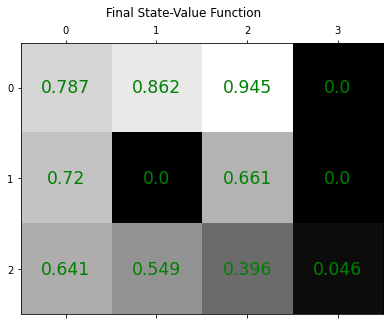

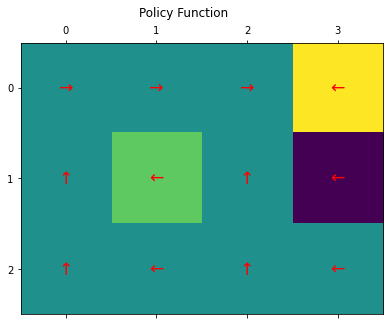

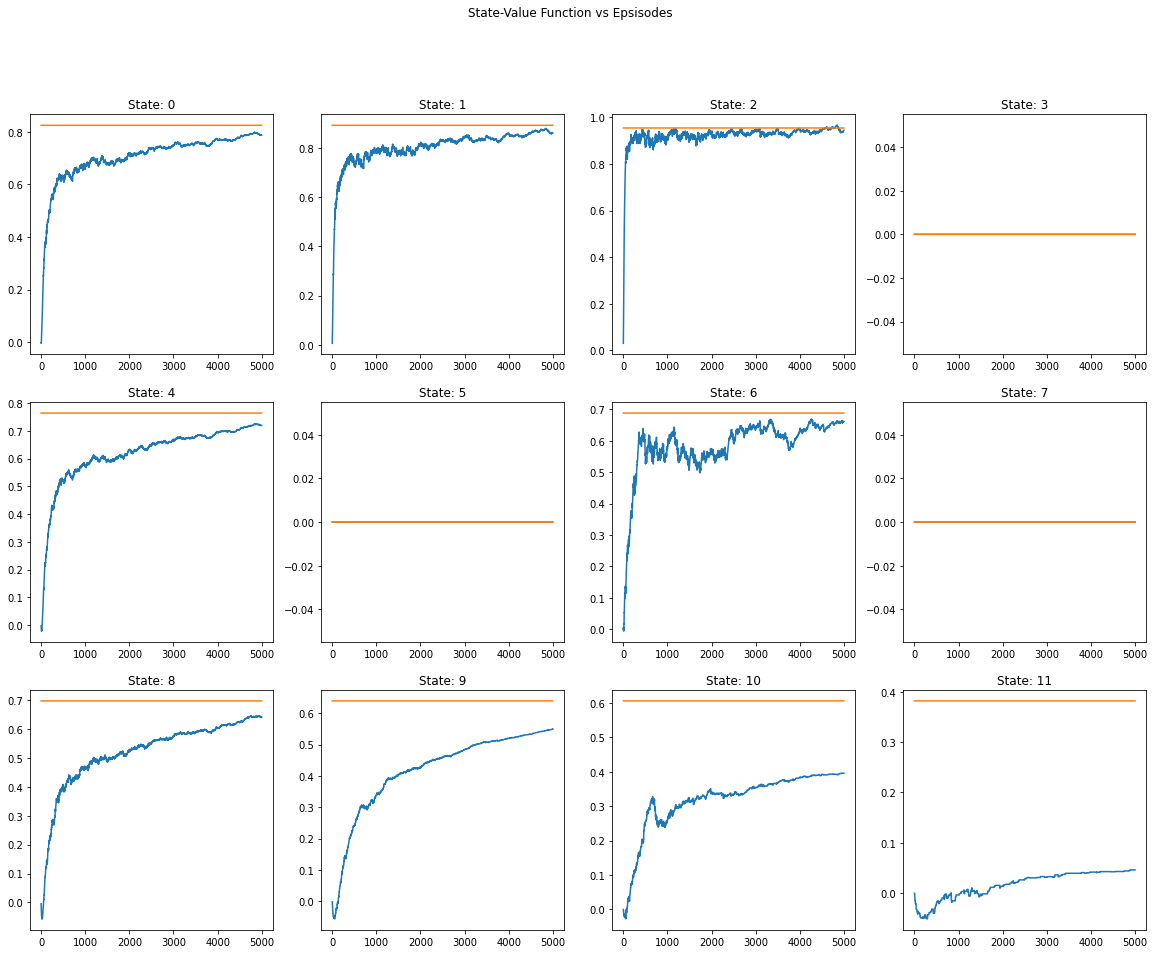

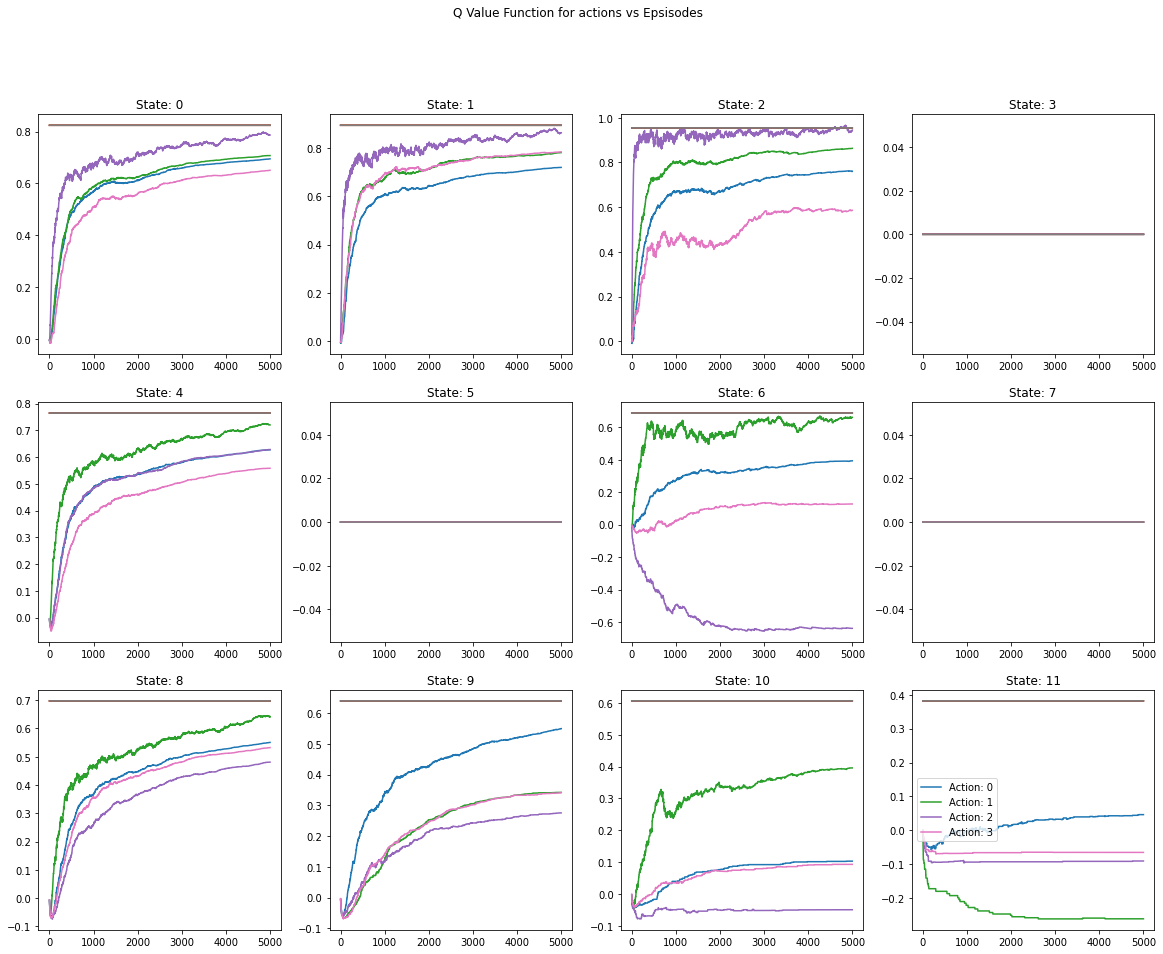

In [241]:
gamma = 0.99
alpha = 0.05
epsilon = 0.4
lda = 0.5
noEpisodes = 5000
replaceTrace = True

state_value, q_value, optimal_policy = experimenter(5, sarsa_lambda, average=True, gamma=gamma, alpha=alpha, epsilon=epsilon, lda=lda, noEpisodes=noEpisodes, replaceTrace=replaceTrace)

plotValueFunction(state_value)
plotPolicy(optimal_policy)
plot(state_value, q_value)

### Seeds and Averaging

a. 5 Instances of the environment with different seeds were used for averaging. The seeds are ```np.arange(5)```

b. The hyperparameters are available in the codeblock used to run the experiment

### Hyperparameter Tuning
    
a. High alpha (>0.6) resulted in higher variance in the plots, and reduced convergence to true estimates

b. Low epsilon (<0.4) resulted in higher bias due to lesser states being explored and updated. This problem was in particular more severe for states not reached often like state 10 and 11

c. Number of epsiodes was increased to to 1000 till convergence was achieved. States in the first row attained convergence much sooner, but improvements for other states in the third row were not seen even on increasing number of episodes.


### Observations
    
a. High bias for states in the third row, while the initial states reach true values

b. Significantly lower variance and lower bias compared to previous implementations. The variance is even lower than Q Learning which is expected because of the double Q-Learning implementation which smoothens sudden updates which can happen when using only one set of Q Values

c. Convergence to ideal policy can be seen. This is quite robust unlike the state values which drastically changes on changing hyperparameters

d. As we expect for terminal states, the state value function returns a zero, providing a sanity check for the implementation

e. Fastest convergence can be seen but a higher bias is visible than single Q-Learning

## Problem 7: SARSA(λ) Accumulating
(40+20+20+5+5+5+5=100 points)

Implement the SARSA(λ) algorithm with Accumulating Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 29, 30.

`SARSA-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = False)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of State-value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


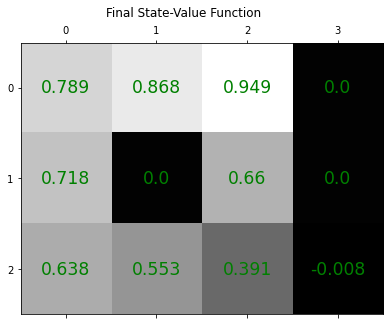

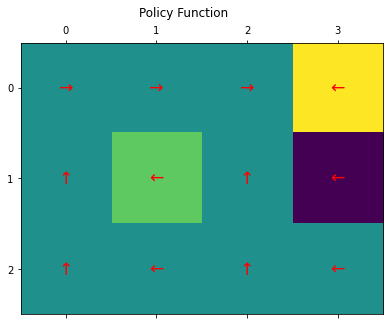

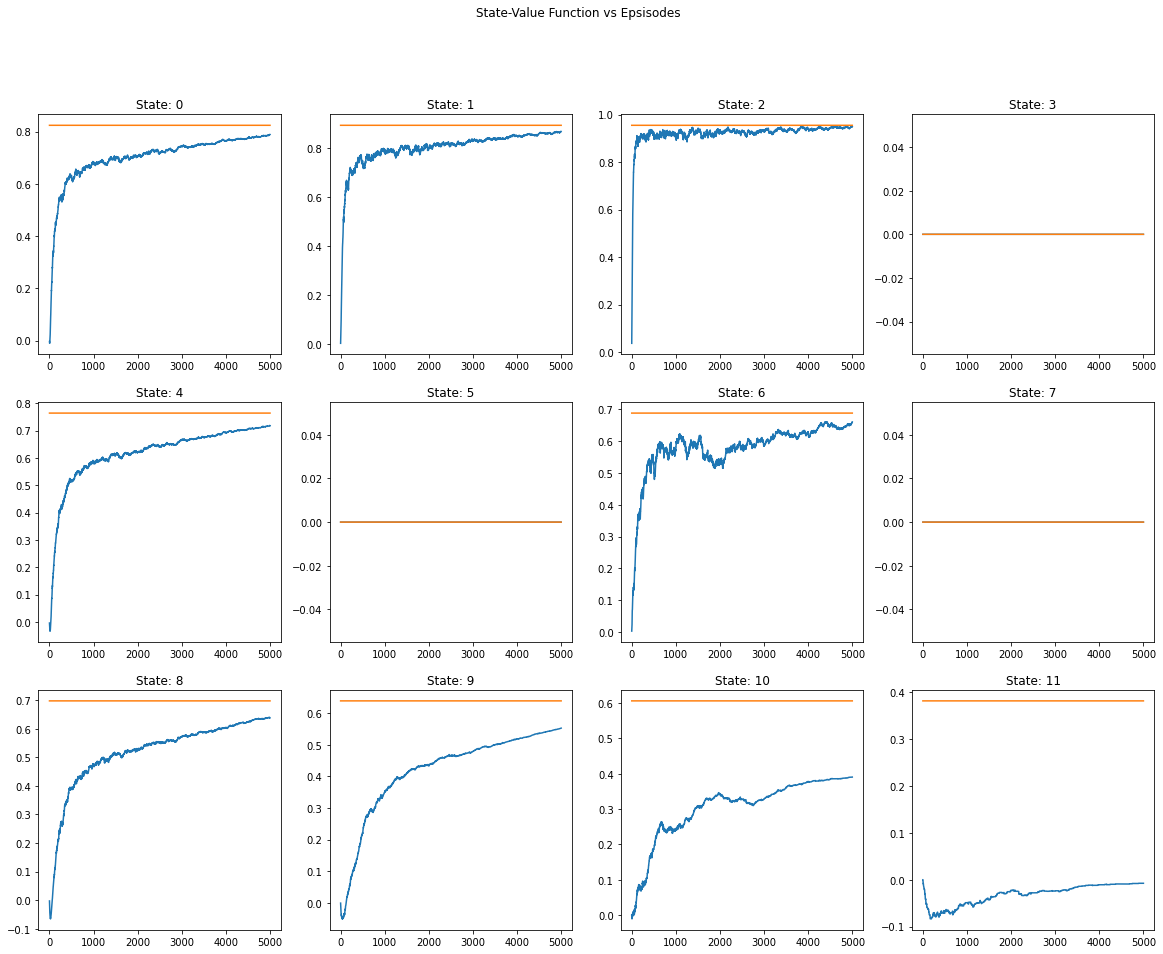

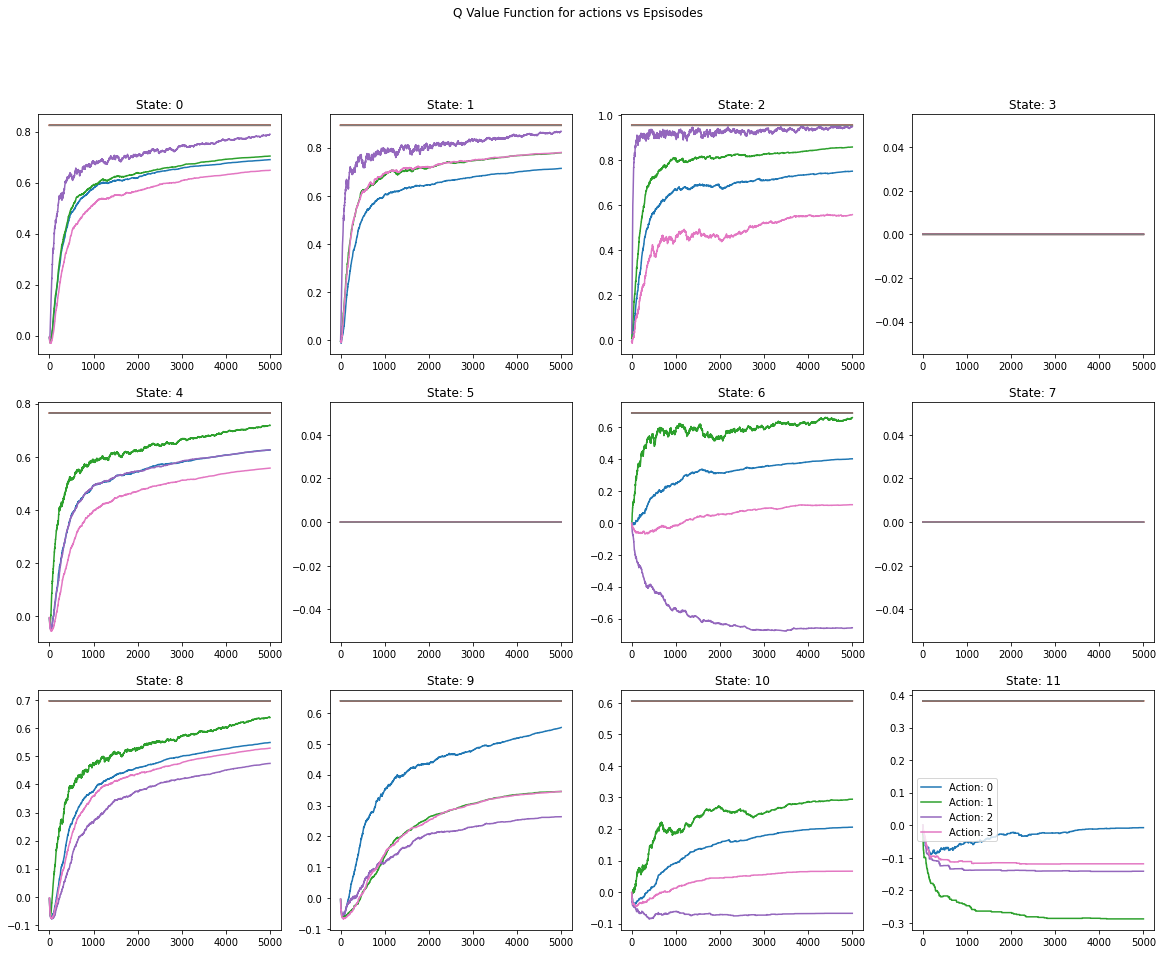

In [242]:
gamma = 0.99
alpha = 0.05
epsilon = 0.4
lda = 0.5
noEpisodes = 5000
replaceTrace = False

state_value, q_value, optimal_policy = experimenter(10, sarsa_lambda, average=True, gamma=gamma, alpha=alpha, epsilon=epsilon, lda=lda, noEpisodes=noEpisodes, replaceTrace=replaceTrace)

plotValueFunction(state_value)
plotPolicy(optimal_policy)
plot(state_value, q_value)

### Seeds and Averaging

a. 5 Instances of the environment with different seeds were used for averaging. The seeds are ```np.arange(5)```

b. The hyperparameters are available in the codeblock used to run the experiment

### Hyperparameter Tuning
    
a. High alpha (>0.6) resulted in higher variance in the plots, and reduced convergence to true estimates

b. Low epsilon (<0.4) resulted in higher bias due to lesser states being explored and updated. This problem was in particular more severe for states not reached often like state 10 and 11

c. Number of epsiodes was increased to to 1000 till convergence was achieved. States in the first row attained convergence much sooner, but improvements for other states in the third row were not seen even on increasing number of episodes.


### Observations
    
a. High bias for states in the third row, while the initial states reach true values

b. Significantly lower variance and lower bias compared to previous implementations. The variance is even lower than Q Learning which is expected because of the double Q-Learning implementation which smoothens sudden updates which can happen when using only one set of Q Values

c. Convergence to ideal policy can be seen. This is quite robust unlike the state values which drastically changes on changing hyperparameters

d. As we expect for terminal states, the state value function returns a zero, providing a sanity check for the implementation

e. Fastest convergence can be seen but a higher bias is visible than single Q-Learning

## Problem 8: Q(λ) Replacing
(40+20+20+5+5+5+5=100 points)

Implement the Q(λ) algorithm with Replacing Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 32, 33.

`Q-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of State-value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [243]:
# Q-lambda Replacing
def q_lambda(env, gamma, alpha, epsilon, lda, noEpisodes, replaceTrace = True):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))

    for e in range(noEpisodes):
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        E = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
        s, terminal = env.reset()
        a = actionSelect(s, Q, epsilon_e)

        while not terminal:
            s_, r, terminal, _ = env.step(a)
            a_ = actionSelect(s_, Q, epsilon_e)
            if Q[s_][a_] == np.max(Q[s_]):
                s_greedy = True
            else:
                s_greedy = False
            td_target = r
            if not terminal:
                td_target += gamma * np.max(Q[s_])
            td_error = td_target - Q[s][a]

            if replaceTrace:
                E[s] = np.zeros(len(env.transition_matrix[0]))
            E[s][a] += 1
            Q += alpha_e*td_error*E
            if s_greedy:
                E *= gamma*lda
            else:
                E = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
            s = s_
            a = a_
        Q_est[e] = Q

    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

100%|██████████| 5/5 [00:12<00:00,  2.44s/it]


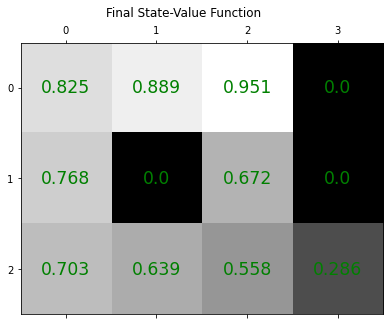

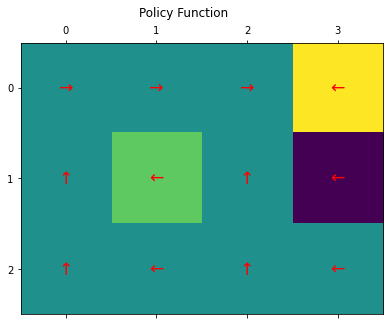

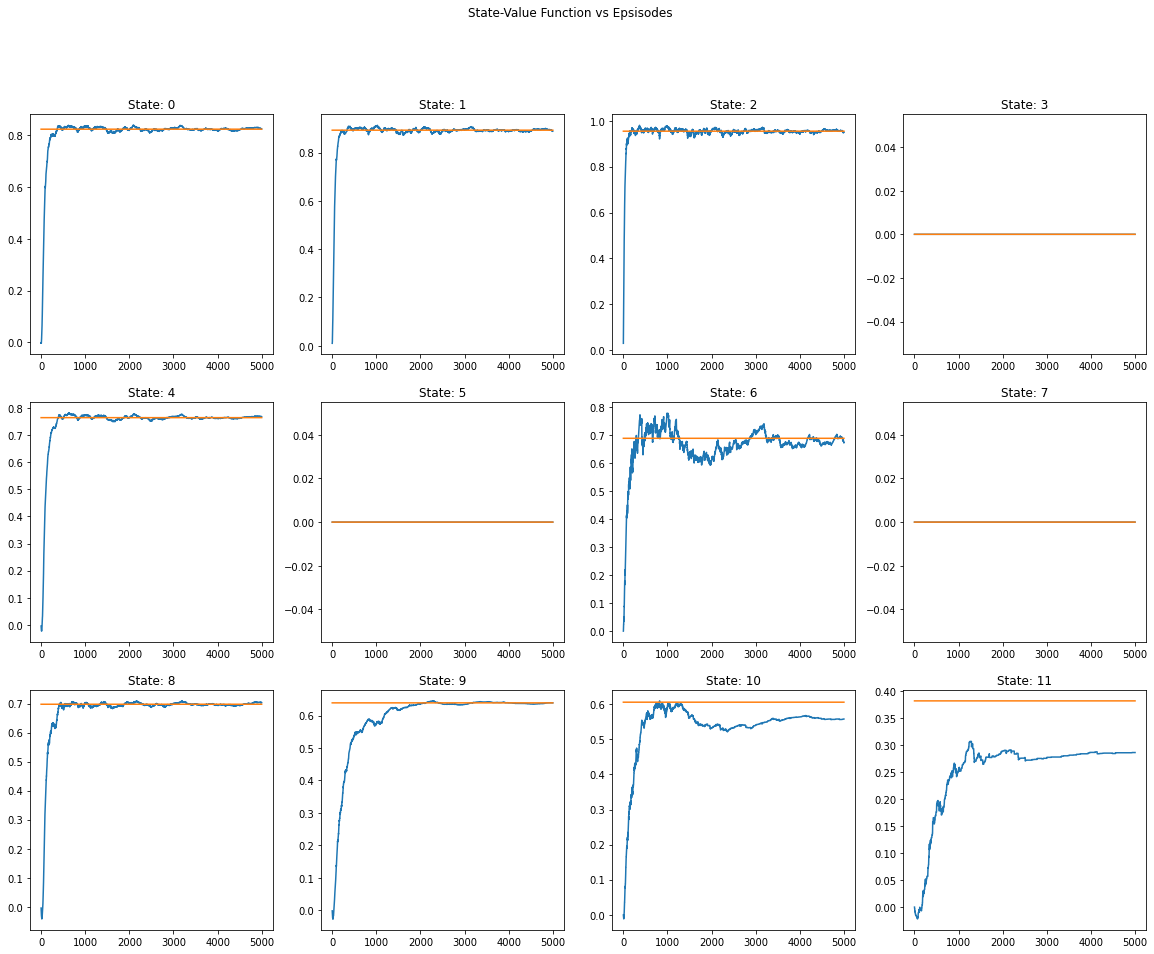

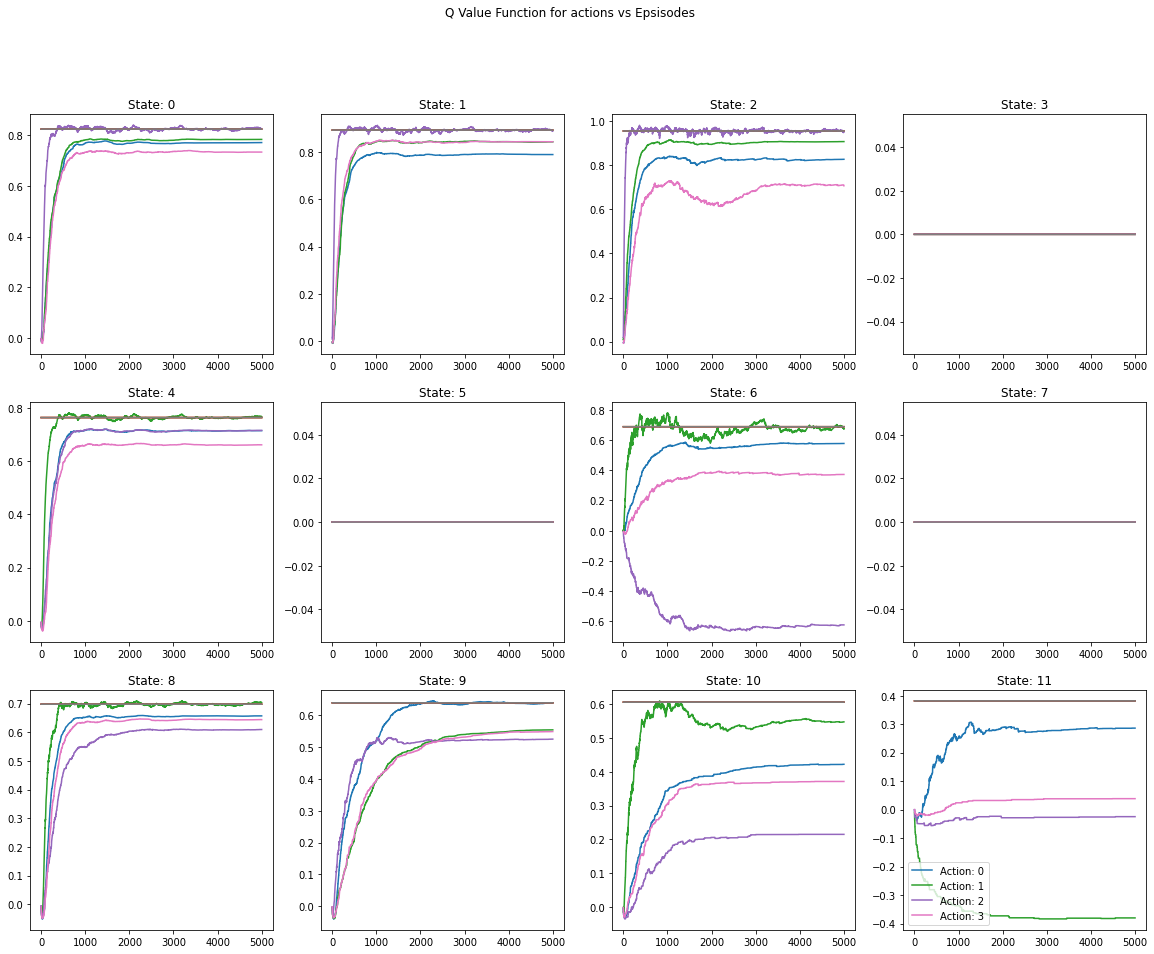

In [245]:
gamma = 0.99
alpha = 0.05
epsilon = 0.4
lda = 0.5
noEpisodes = 5000
replaceTrace = True

state_value, q_value, optimal_policy = experimenter(5, q_lambda, average=True, gamma=gamma, alpha=alpha, epsilon=epsilon, lda=lda, noEpisodes=noEpisodes, replaceTrace=replaceTrace)

plotValueFunction(state_value)
plotPolicy(optimal_policy)
plot(state_value, q_value)

### Seeds and Averaging

a. 5 Instances of the environment with different seeds were used for averaging. The seeds are ```np.arange(5)```

b. The hyperparameters are available in the codeblock used to run the experiment

### Hyperparameter Tuning
    
a. High alpha (>0.6) resulted in higher variance in the plots, and reduced convergence to true estimates

b. Low epsilon (<0.4) resulted in higher bias due to lesser states being explored and updated. This problem was in particular more severe for states not reached often like state 10 and 11

c. Number of epsiodes was increased to to 1000 till convergence was achieved. States in the first row attained convergence much sooner, but improvements for other states in the third row were not seen even on increasing number of episodes.


### Observations
    
a. High bias for states in the third row, while the initial states reach true values

b. Significantly lower variance and lower bias compared to previous implementations. The variance is even lower than Q Learning which is expected because of the double Q-Learning implementation which smoothens sudden updates which can happen when using only one set of Q Values

c. Convergence to ideal policy can be seen. This is quite robust unlike the state values which drastically changes on changing hyperparameters

d. As we expect for terminal states, the state value function returns a zero, providing a sanity check for the implementation

e. Fastest convergence can be seen but a higher bias is visible than single Q-Learning

## Problem 9: Q(λ) Accumulating
(40+20+20+5+5+5+5=100 points)

Implement the Q(λ) algorithm with Accumulating Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 32, 33.

`Q-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = False)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of State-value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

100%|██████████| 5/5 [00:11<00:00,  2.31s/it]


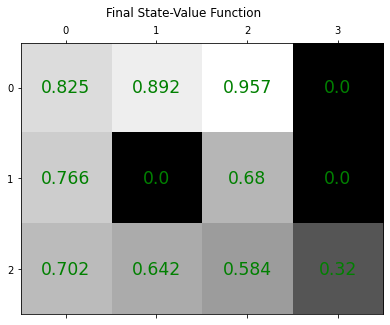

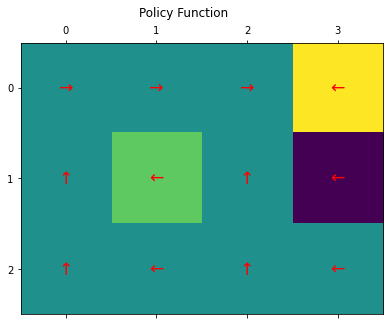

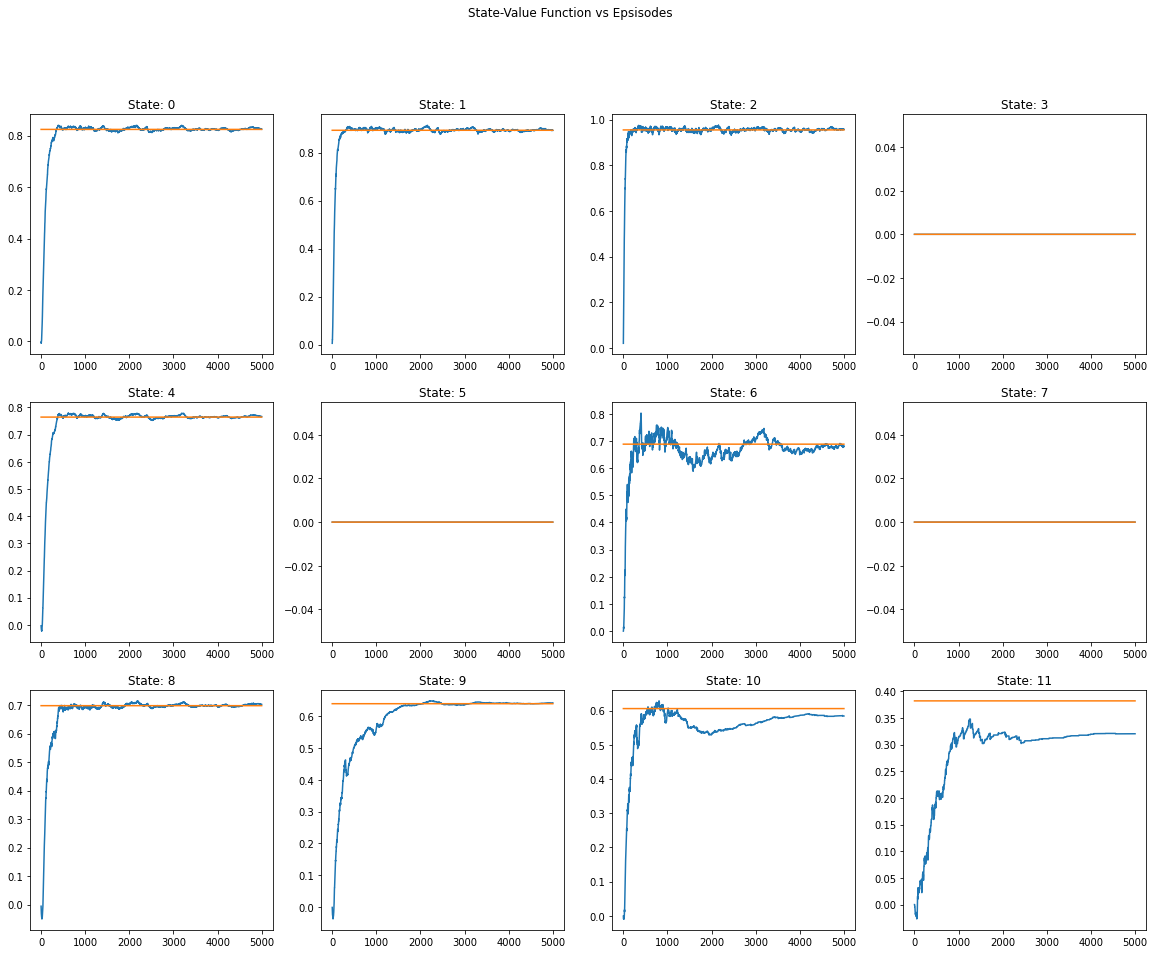

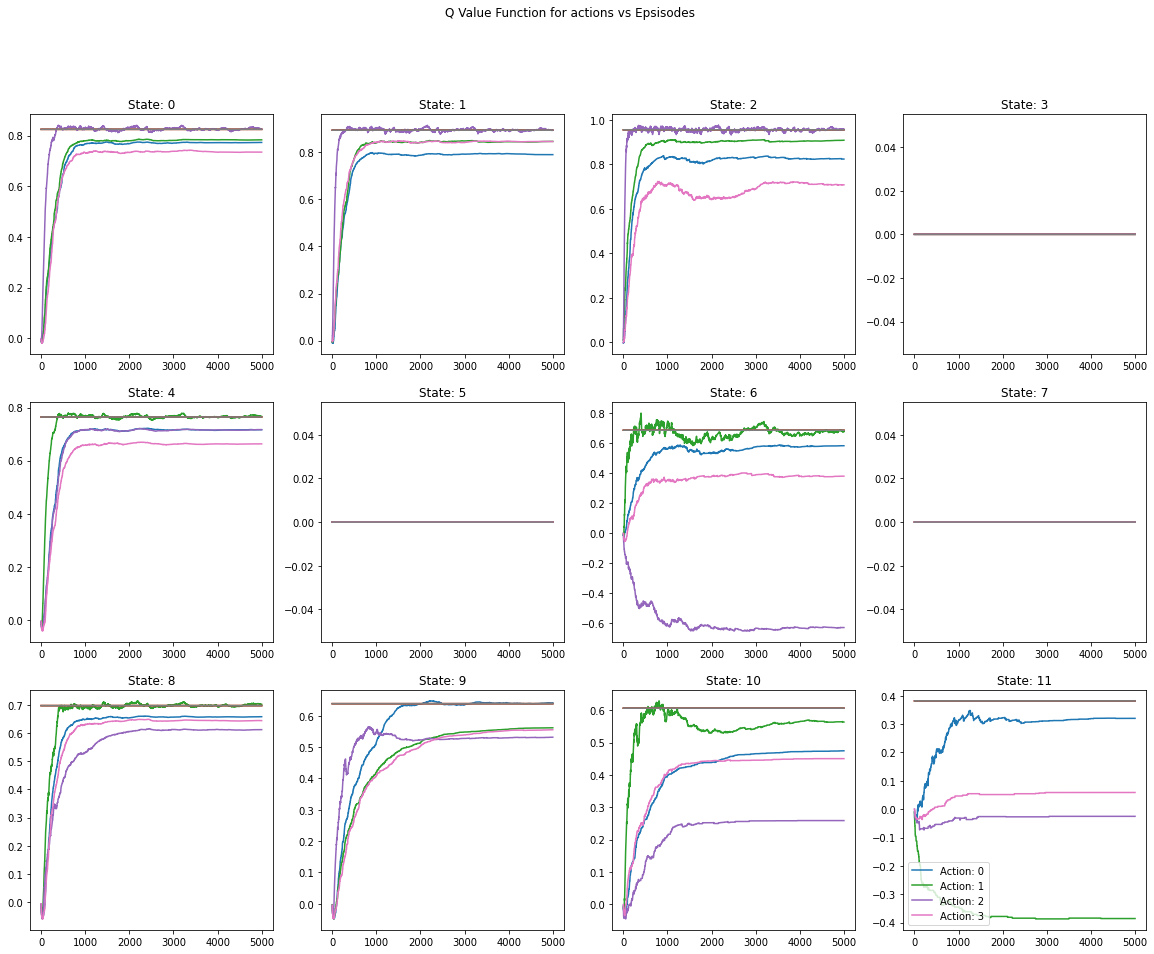

In [247]:
gamma = 0.99
alpha = 0.05
epsilon = 0.4
lda = 0.5
noEpisodes = 5000
replaceTrace = False

state_value, q_value, optimal_policy = experimenter(5, q_lambda, average=True, gamma=gamma, alpha=alpha, epsilon=epsilon, lda=lda, noEpisodes=noEpisodes, replaceTrace=replaceTrace)

plotValueFunction(state_value)
plotPolicy(optimal_policy)
plot(state_value, q_value)

### Seeds and Averaging

a. 5 Instances of the environment with different seeds were used for averaging. The seeds are ```np.arange(5)```

b. The hyperparameters are available in the codeblock used to run the experiment

### Hyperparameter Tuning
    
a. High alpha (>0.6) resulted in higher variance in the plots, and reduced convergence to true estimates

b. Low epsilon (<0.4) resulted in higher bias due to lesser states being explored and updated. This problem was in particular more severe for states not reached often like state 10 and 11

c. Number of epsiodes was increased to to 1000 till convergence was achieved. States in the first row attained convergence much sooner, but improvements for other states in the third row were not seen even on increasing number of episodes.


### Observations
    
a. High bias for states in the third row, while the initial states reach true values

b. Significantly lower variance and lower bias compared to previous implementations. The variance is even lower than Q Learning which is expected because of the double Q-Learning implementation which smoothens sudden updates which can happen when using only one set of Q Values

c. Convergence to ideal policy can be seen. This is quite robust unlike the state values which drastically changes on changing hyperparameters

d. As we expect for terminal states, the state value function returns a zero, providing a sanity check for the implementation

e. Fastest convergence can be seen but a higher bias is visible than single Q-Learning

## Problem 10: Dyna-Q
(40+20+20+5+5+5+5=100 points)

Implement the Dyna-Q algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 36, 37.

`Dyna-Q(env, γ, α0, ϵ0, noEpisodes, noPlanning)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of State-value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [248]:
def getVisitedStateAction(T):
    store = {}
    for state in range(T.shape[0]):
        for action in range(T.shape[1]):
            for next_state in range(T.shape[2]):
                if T[state][action][next_state] > 0:
                    try:
                        store[state].append(action)
                    except:
                        store[state] = [action]
    s = np.random.choice(list(store.keys()))
    a = np.random.choice(store[s])
    return s, a

In [250]:
# Dyna-Q
def dyna_q(env, gamma, alpha, epsilon, noEpisodes, noPlanning):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    T = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0]), len(env.transition_matrix.keys())+1))
    R = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0]), len(env.transition_matrix.keys())+1))

    for e in range(noEpisodes):
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        s, terminal = env.reset()

        store = {}
        while not terminal:
            a = actionSelect(s, Q, epsilon_e)
            s_, r, terminal, _ = env.step(a)
            T[s][a][s_] += 1
            try:
                store[s].append(a)
            except:
                store[s] = [a]
            rDiff = r - R[s][a][s_]
            R[s][a][s_] += rDiff/T[s][a][s_]
            td_target = r 
            if not terminal:
                td_target += gamma * np.max(Q[s_])
            td_error = td_target - Q[s][a]
            Q[s][a] += alpha_e*td_error
            s_back_up = s_

            for _ in range(noPlanning):
                if np.sum(Q) == 0:
                    break
                # s, a = getVisitedStateAction(T)
                s = np.random.choice(list(store.keys()))
                a = np.random.choice(store[s])
                prob_s_ = T[s][a]/np.sum(T[s][a])
                s_ = np.random.choice(len(env.transition_matrix.keys())+1, size=1, p=prob_s_)
                r = R[s][a][s_]
                td_target = r + gamma * np.max(Q[s_])
                td_error = td_target - Q[s][a]
                Q[s][a] += alpha_e*td_error
            s = s_back_up
        Q_est[e] = Q

    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

100%|██████████| 5/5 [00:52<00:00, 10.47s/it]


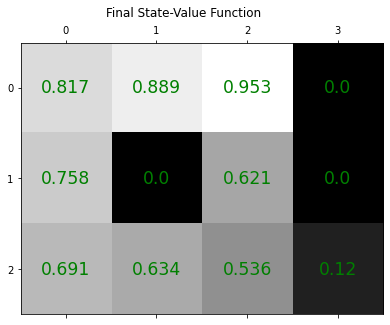

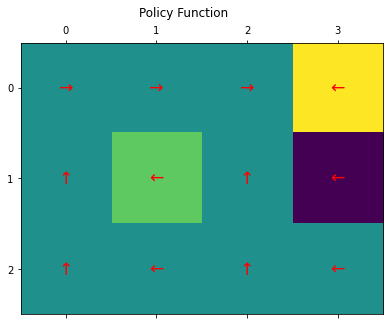

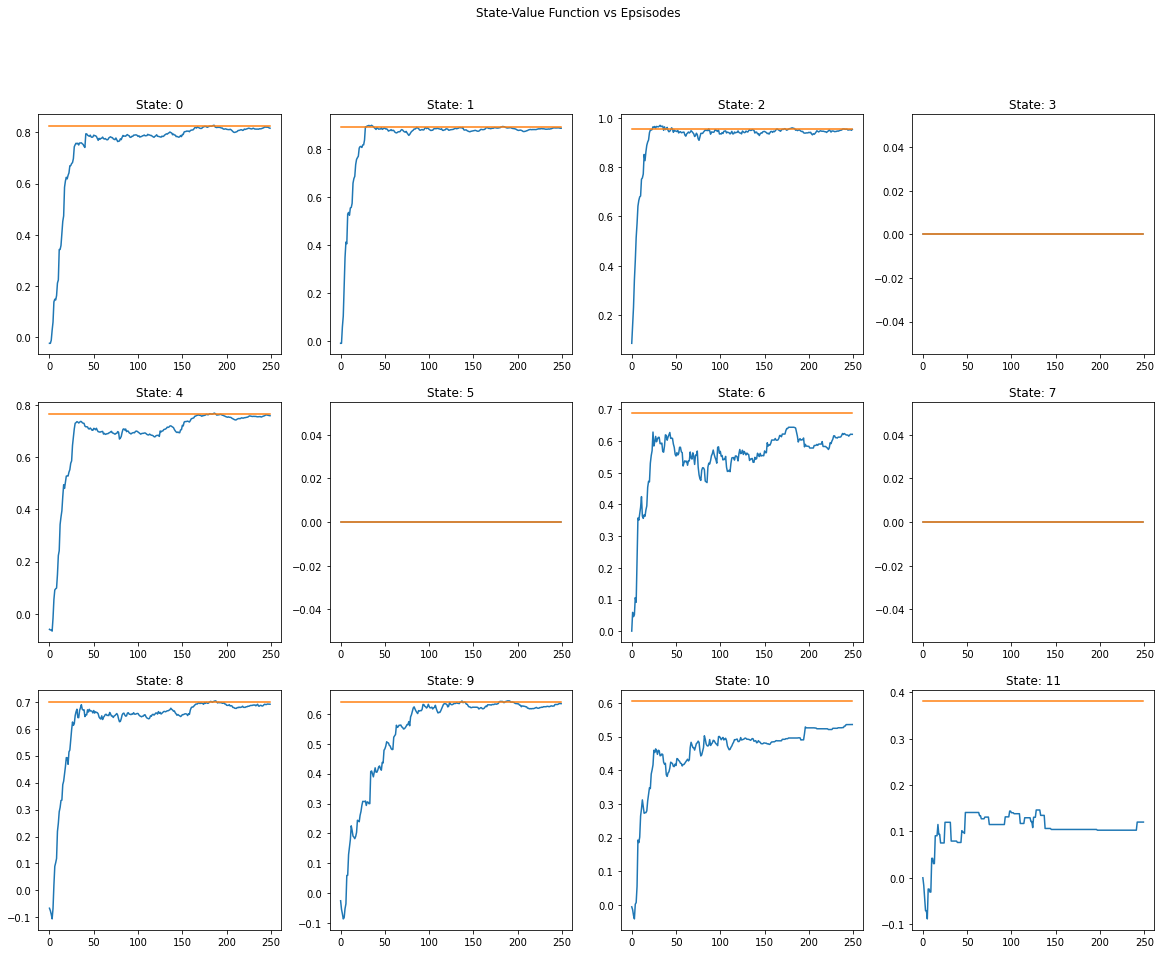

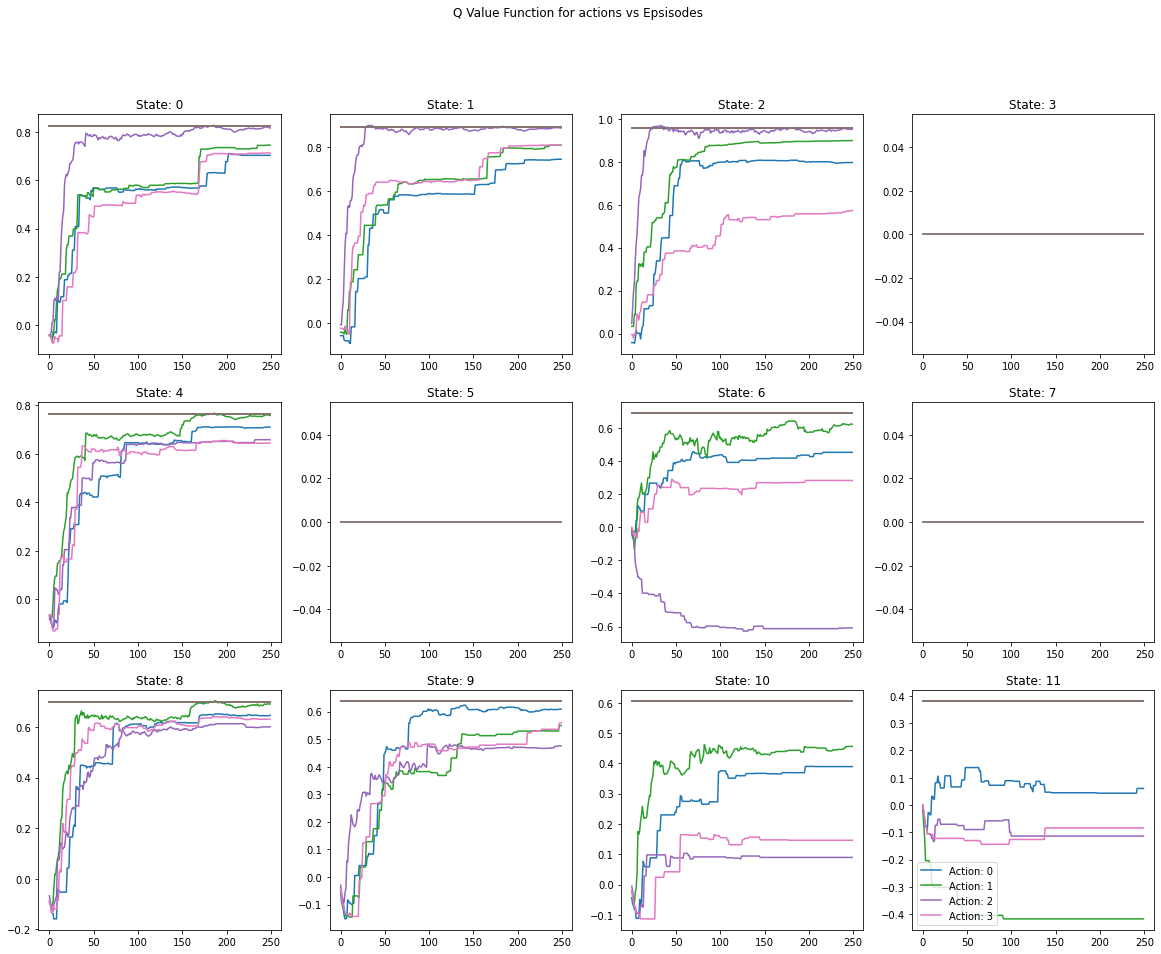

In [252]:
gamma = 0.99
alpha = 0.05
epsilon = 0.3
noEpisodes = 250
noPlanning = 50

state_value, q_value, optimal_policy = experimenter(5, dyna_q, gamma=gamma, alpha=alpha, epsilon=epsilon, noEpisodes=noEpisodes, noPlanning=noPlanning)

plotValueFunction(state_value)
plotPolicy(optimal_policy)
plot(state_value, q_value)

### Seeds and Averaging

a. 5 Instances of the environment with different seeds were used for averaging. The seeds are ```np.arange(5)```

b. The hyperparameters are available in the codeblock used to run the experiment

### Hyperparameter Tuning
    
a. High alpha (>0.6) resulted in higher variance in the plots, and reduced convergence to true estimates

b. Low epsilon (<0.4) resulted in higher bias due to lesser states being explored and updated. This problem was in particular more severe for states not reached often like state 10 and 11

c. Number of epsiodes was increased to to 1000 till convergence was achieved. States in the first row attained convergence much sooner, but improvements for other states in the third row were not seen even on increasing number of episodes.


### Observations
    
a. High bias for states in the third row, while the initial states reach true values

b. Significantly lower variance and lower bias compared to previous implementations. The variance is even lower than Q Learning which is expected because of the double Q-Learning implementation which smoothens sudden updates which can happen when using only one set of Q Values

c. Convergence to ideal policy can be seen. This is quite robust unlike the state values which drastically changes on changing hyperparameters

d. As we expect for terminal states, the state value function returns a zero, providing a sanity check for the implementation

e. Fastest convergence can be seen but a higher bias is visible than single Q-Learning

## Problem 11: Trajectory Learning
(40+20+20+5+5+5+5=100 points)

Implement the Trajectory Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 40, 41, 42.

`TrajectorySampling(env, γ, α0, ϵ0, noEpisodes, maxTrajectory)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of State-value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [253]:
# Trajectory sampling
def trajectory_sampling(env, gamma, alpha, epsilon, noEpisodes, maxTrajectory):
    Q = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    Q_est = np.zeros((noEpisodes, len(env.transition_matrix.keys())+1, len(env.transition_matrix[0])))
    T = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0]), len(env.transition_matrix.keys())+1))
    R = np.zeros((len(env.transition_matrix.keys())+1, len(env.transition_matrix[0]), len(env.transition_matrix.keys())+1))

    for e in range(noEpisodes):
        alpha_e = decayLearningRate(alpha, e, noEpisodes)
        epsilon_e = decayEpsilon(epsilon, e, noEpisodes)
        s, terminal = env.reset()

        while not terminal:
            a = actionSelect(s, Q, epsilon_e)
            s_, r, terminal, _ = env.step(a)
            T[s, a, s_] += 1
            rDiff = r - R[s, a, s_]
            R[s][a][s_] += rDiff/T[s][a][s_]
            td_target = r 
            if not terminal:
                td_target += gamma * np.max(Q[s_])
            td_error = td_target - Q[s][a]
            Q[s][a] += alpha_e*td_error
            s_back_up = s_

            for _ in range(maxTrajectory):
                if np.sum(Q) == 0:
                    break
                a = np.random.choice(np.flatnonzero(np.isclose(Q[s], np.max(Q[s]))))
                # OR 
                # a = actionSelect(s, Q, epsilon_e)
                if np.sum(T[s,a]) == 0:
                    break
                prob_s_ = np.squeeze(T[s,a]/np.sum(T[s,a]))
                s_ = np.random.choice(len(env.transition_matrix.keys())+1, size=1, p=prob_s_)
                r = R[s, a, s_]
                td_target = r + gamma * np.max(Q[s_])
                td_error = td_target - Q[s, a]
                Q[s, a] += alpha_e*td_error
                s = s_
            s = s_back_up
        Q_est[e] = Q

    state_value = np.max(Q_est, axis=2)
    q_value = Q_est
    optimal_policy = GreedyPolicy(q_value[-1])

    return state_value, q_value, optimal_policy

100%|██████████| 5/5 [00:09<00:00,  1.81s/it]


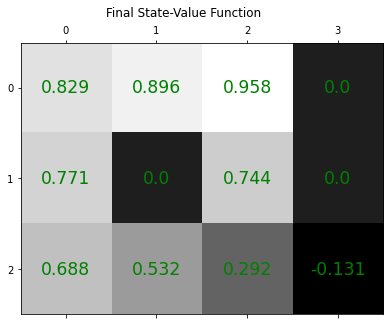

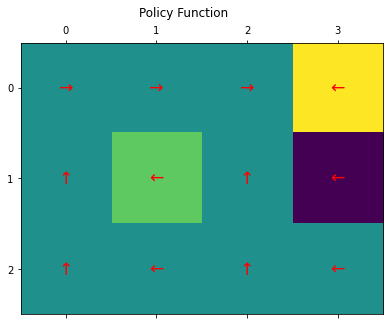

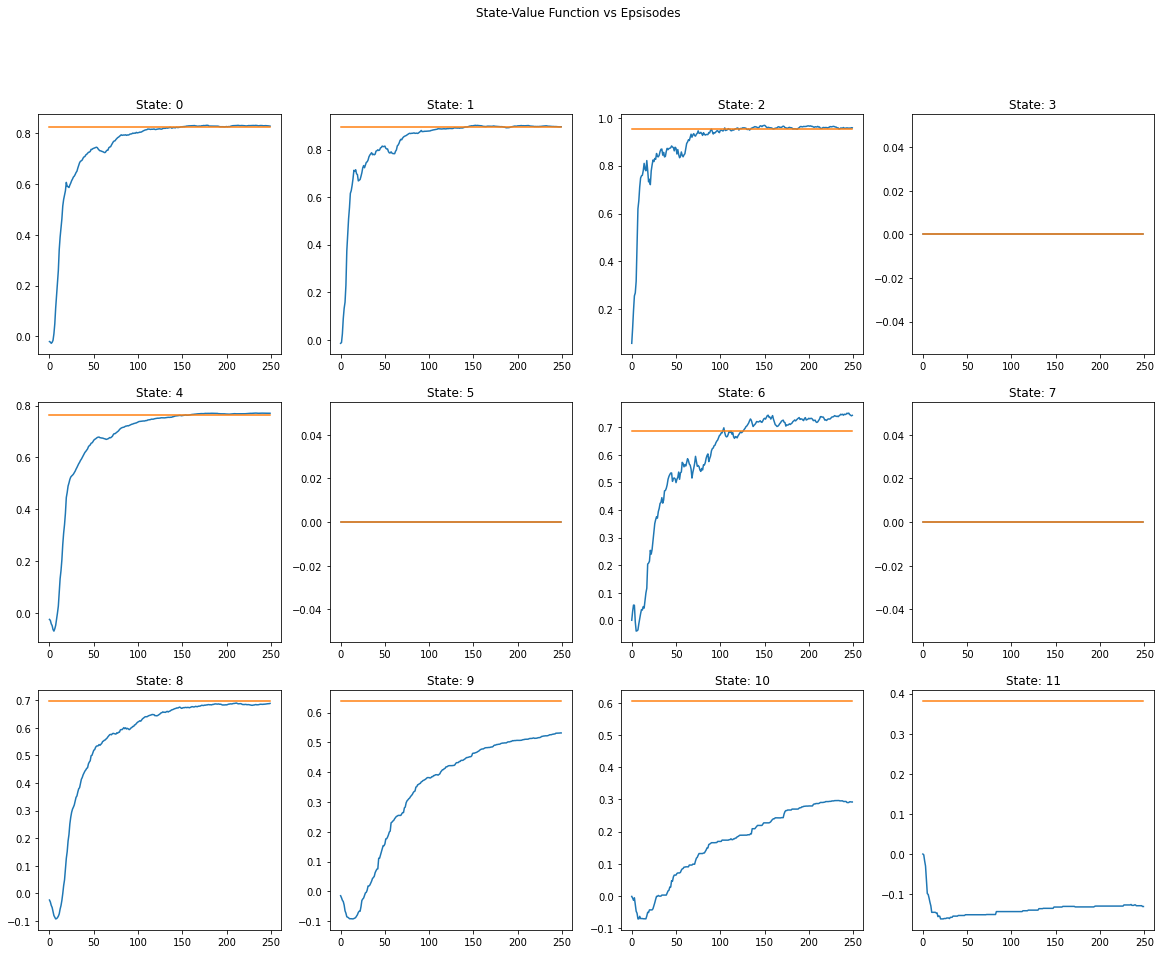

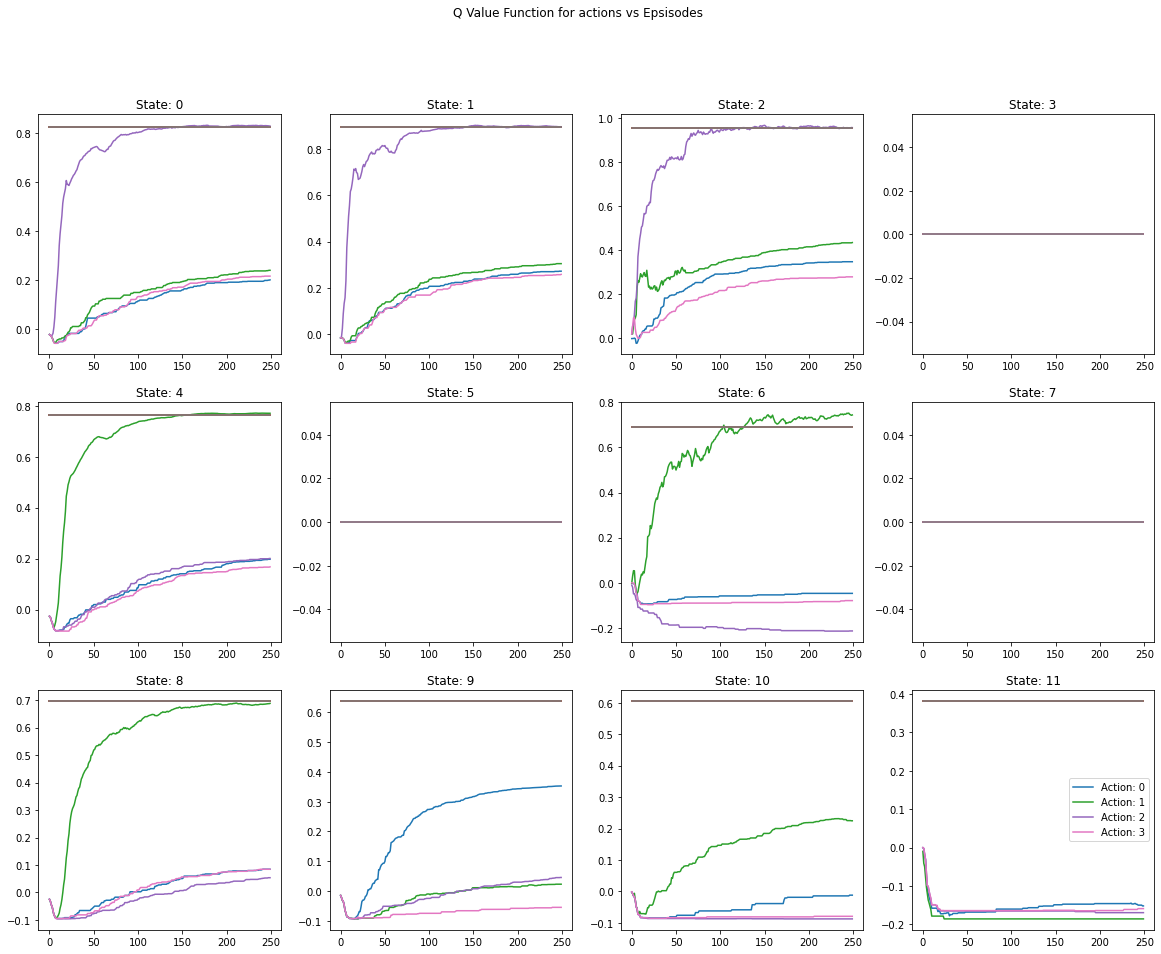

In [278]:
gamma = 0.99
alpha = 0.05
epsilon = 0.3
noEpisodes = 250
maxTrajectory = 50

state_value, q_value, optimal_policy = experimenter(5, trajectory_sampling, gamma=gamma, alpha=alpha, epsilon=epsilon, noEpisodes=noEpisodes, maxTrajectory=maxTrajectory)

plotValueFunction(state_value)
plotPolicy(optimal_policy)
plot(state_value, q_value)

### Seeds and Averaging

a. 5 Instances of the environment with different seeds were used for averaging. The seeds are ```np.arange(5)```

b. The hyperparameters are available in the codeblock used to run the experiment

### Hyperparameter Tuning
    
a. High alpha (>0.6) resulted in higher variance in the plots, and reduced convergence to true estimates

b. Low epsilon (<0.4) resulted in higher bias due to lesser states being explored and updated. This problem was in particular more severe for states not reached often like state 10 and 11

c. Number of epsiodes was increased to to 1000 till convergence was achieved. States in the first row attained convergence much sooner, but improvements for other states in the third row were not seen even on increasing number of episodes.


### Observations
    
a. High bias for states in the third row, while the initial states reach true values

b. Significantly lower variance and lower bias compared to previous implementations. The variance is even lower than Q Learning which is expected because of the double Q-Learning implementation which smoothens sudden updates which can happen when using only one set of Q Values

c. Convergence to ideal policy can be seen. This is quite robust unlike the state values which drastically changes on changing hyperparameters

d. As we expect for terminal states, the state value function returns a zero, providing a sanity check for the implementation

e. Fastest convergence can be seen but a higher bias is visible than single Q-Learning

## Problem 12: Comparing Control Algorithms
(5+5+5+5+5+5=25 points)

For SARSA(λ) Replacing, SARSA(λ) Accumulating, Q(λ) Replacing, Q(λ) Accumulating, Dyna-Q, Trajectory Learning implemented above, do the following:

(a) For each of the algorithm, in a single plot, plot the evolution of Policy Success Rate (in %) vs Episodes.

(b) What are your observations from the Policy Success Rate (in %) plot.

(c) For each of the algorithm (in a single plot), plot the Estimated Expected Return (from the start state) vs Episodes.

(d) What are your observations for the Estimated Expected Return plot?

(e) For each of the algorithm (in a single plot), plot the State-value Function Estimation Error vs Episodes. State-value Function Estimation Error is defined as Mean Absolute Error across all V-function estimates (across all states) from the respective optimal value.

(f) What are your observations for the State-value Function Estimation Error plot?

In [260]:
def plot_policy_success_rate_togetherSECOND(instances=10, maxEpisodes=50, maxSteps=50, noEpisodes=250):
    
    env = gym.make('environments:random_maze-v0')
    env.seed(21)
    policy_success_rates = np.zeros((instances, noEpisodes))

    plt.rcParams["figure.figsize"] = (20,5)

    _, q_value, _ = experimenter(instances, trajectory_sampling, average=False, gamma=0.99, alpha=0.05, epsilon=0.6, noEpisodes=noEpisodes, maxTrajectory=50)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Trajectory Sampling')

    _, q_value, _ = experimenter(instances, dyna_q, average=False, gamma=0.9, alpha=0.05, epsilon=0.3, noEpisodes=noEpisodes, noPlanning=50)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Dyna Q')

    _, q_value, _ = experimenter(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='SARSA(λ) Replacing')

    _, q_value, _ = experimenter(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='SARSA(λ) Accumulating')

    _, q_value, _ = experimenter(instances, q_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Q(λ) Replacing')

    _, q_value, _ = experimenter(instances, q_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            policy_success_rates[i][e] = get_policy_success_rate(env, policy, env.goal, maxEpisodes, maxSteps)
    plt.plot(np.arange(noEpisodes), np.mean(policy_success_rates,axis=0), label='Q(λ) Accumulating')
        
    plt.title('Policy Success Rate vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Policy Success Rate')
    plt.legend()
    plt.show()

100%|██████████| 5/5 [02:51<00:00, 34.21s/it]


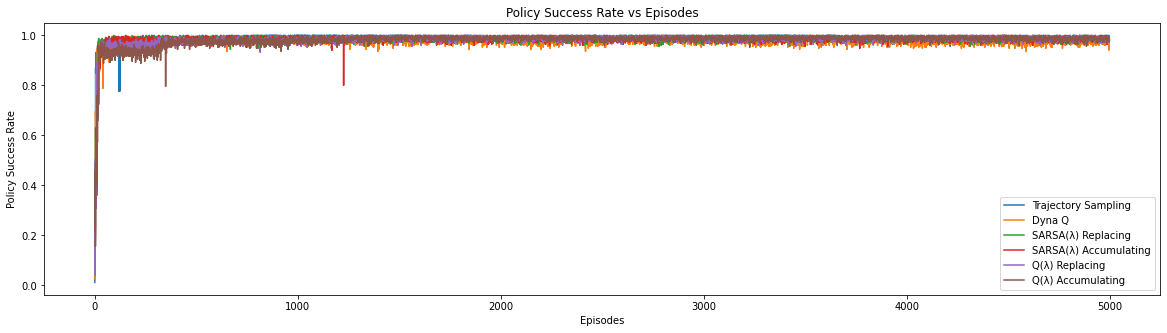

In [261]:
plot_policy_success_rate_togetherSECOND(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=5000)

100%|██████████| 5/5 [00:34<00:00,  6.91s/it]


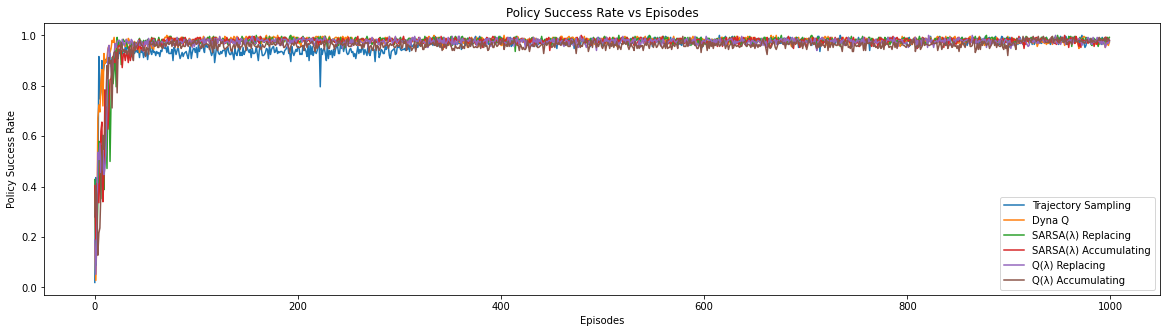

In [264]:
plot_policy_success_rate_togetherSECOND(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=1000)

100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


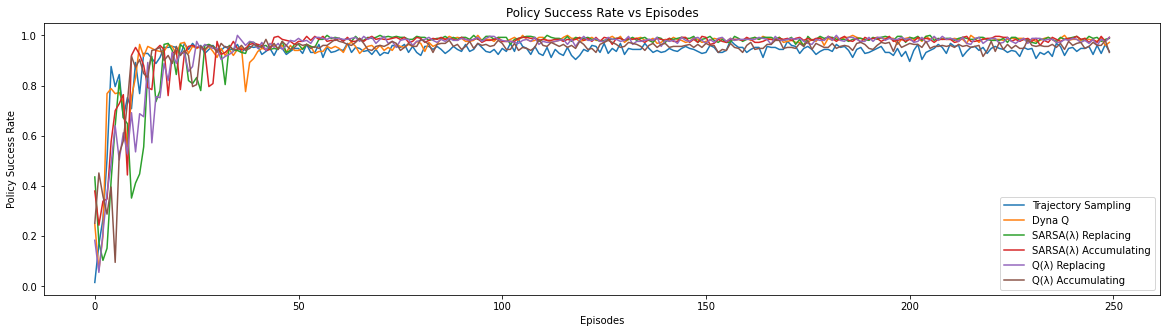

In [270]:
plot_policy_success_rate_togetherSECOND(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=250)

### Policy Success Comparison

In [265]:
def plot_expected_return_togetherSECOND(instances=5, maxEpisodes=10, maxSteps=50, noEpisodes=250, discount=0.99):
    
    env = gym.make('environments:random_maze-v0')
    env.seed(21)
    expected_return = np.zeros((instances, noEpisodes))

    plt.rcParams["figure.figsize"] = (20,5)

    _, q_value, _ = experimenter(instances, trajectory_sampling, average=False, gamma=0.99, alpha=0.05, epsilon=0.6, noEpisodes=noEpisodes, maxTrajectory=50)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Trajectory Sampling')

    _, q_value, _ = experimenter(instances, dyna_q, average=False, gamma=0.99, alpha=0.05, epsilon=0.3, noEpisodes=noEpisodes, noPlanning=50)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Dyna Q')

    _, q_value, _ = experimenter(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='SARSA(λ) Replacing')

    _, q_value, _ = experimenter(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='SARSA(λ) Accumulating')

    _, q_value, _ = experimenter(instances, q_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Q(λ) Replacing')

    _, q_value, _ = experimenter(instances, q_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            policy = GreedyPolicy(q_value[i][e])
            expected_return[i][e] = get_expected_return(env, policy, maxEpisodes=maxEpisodes, maxSteps=maxSteps, discount=discount)
    plt.plot(np.arange(noEpisodes), np.mean(expected_return,axis=0), label='Q(λ) Accumulating')
        
    plt.title('Expected Return vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.show()

100%|██████████| 5/5 [00:06<00:00,  1.30s/it]


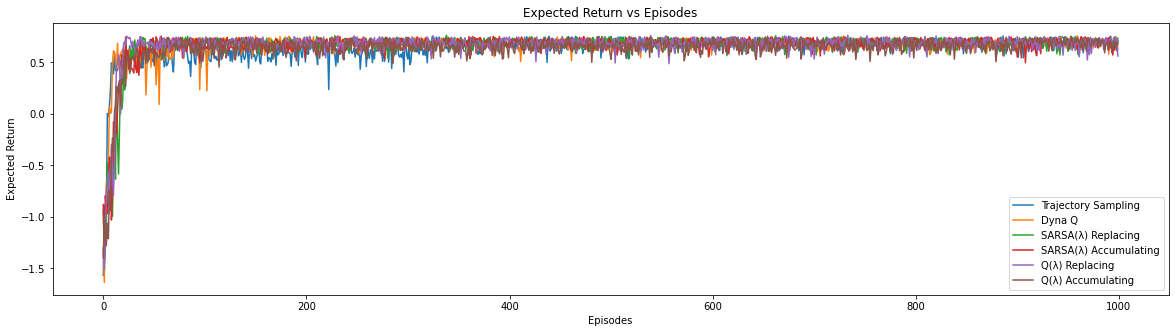

In [266]:
plot_expected_return_togetherSECOND(instances=5, maxEpisodes=10, maxSteps=50, noEpisodes=1000, discount=0.99)

100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


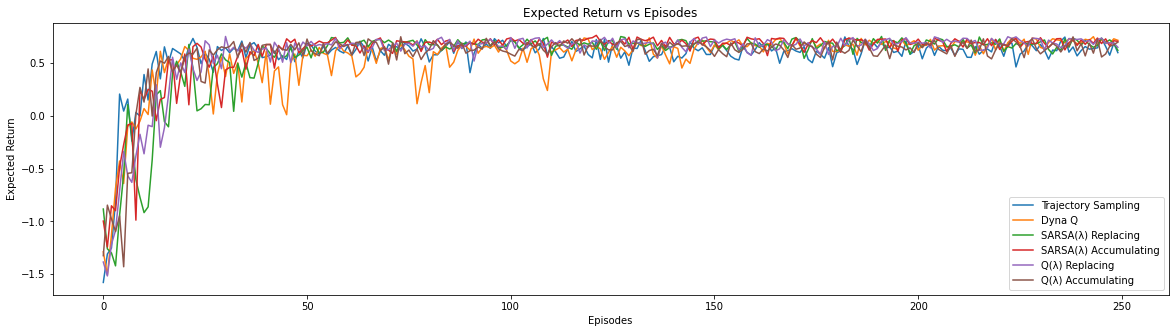

In [269]:
plot_expected_return_togetherSECOND(instances=5, maxEpisodes=10, maxSteps=50, noEpisodes=250, discount=0.99)

### Expected Return Comparison

In [267]:
def plot_estimate_error_togetherSECOND(instances=10, maxEpisodes=50, maxSteps=50, noEpisodes=250):
    env = gym.make('environments:random_maze-v0')
    env.seed(21)

    plt.rcParams["figure.figsize"] = (20,5)
    estimate_errors = np.zeros((instances, noEpisodes))


    state_value, _, _ = experimenter(instances, trajectory_sampling, average=False, gamma=0.99, alpha=0.05, epsilon=0.6, noEpisodes=noEpisodes, maxTrajectory=50)
    true_estimates = np.mean(state_value, axis=0)[-1]
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Trajectory Sampling')

    state_value, _, _ = experimenter(instances, dyna_q, average=False, gamma=0.99, alpha=0.05, epsilon=0.3, noEpisodes=noEpisodes, noPlanning=50)
    true_estimates = np.mean(state_value, axis=0)[-1]
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Dyna Q')

    state_value, _, _ = experimenter(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    true_estimates = np.mean(state_value, axis=0)[-1]
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='SARSA(λ) Replacing')

    state_value, _, _ = experimenter(instances, sarsa_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    true_estimates = np.mean(state_value, axis=0)[-1]
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='SARSA(λ) Accumulating')

    state_value, _, _ = experimenter(instances, q_lambda, average=False, gamma=0.99, alpha=0.05, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=True)
    true_estimates = np.mean(state_value, axis=0)[-1]
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Q(λ) Replacing')

    state_value, _, _ = experimenter(instances, q_lambda, average=False, gamma=0.99, alpha=0.5, epsilon=0.4, lda=0.5, noEpisodes=noEpisodes, replaceTrace=False)
    true_estimates = np.mean(state_value, axis=0)[-1]
    for i in tqdm(range(instances)):
        for e in range(noEpisodes):
            estimate_errors[i][e] = np.mean(np.abs(state_value[i][e] - true_estimates))
    plt.plot(np.arange(noEpisodes), np.mean(estimate_errors,axis=0), label='Q(λ) Accumulating')
        
    plt.title('Estimated Mean State Value Error vs Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Mean State Value Error')
    plt.legend()
    plt.show()

100%|██████████| 5/5 [00:00<00:00, 27.36it/s]


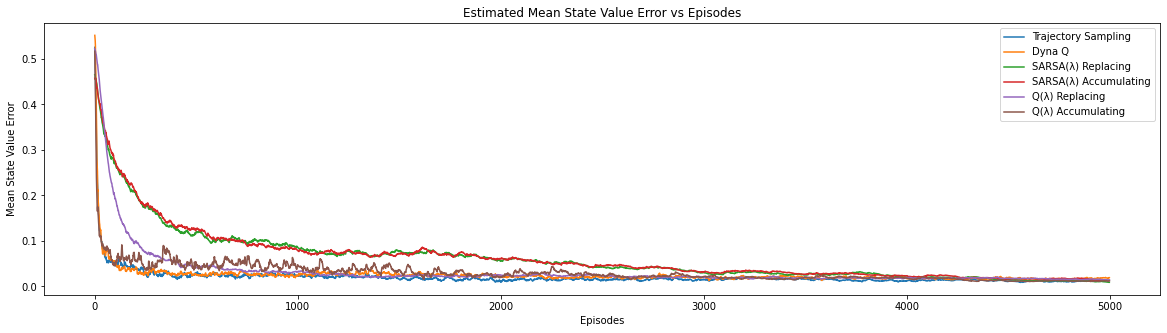

In [268]:
plot_estimate_error_togetherSECOND(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=5000)

100%|██████████| 5/5 [00:00<00:00, 106.13it/s]


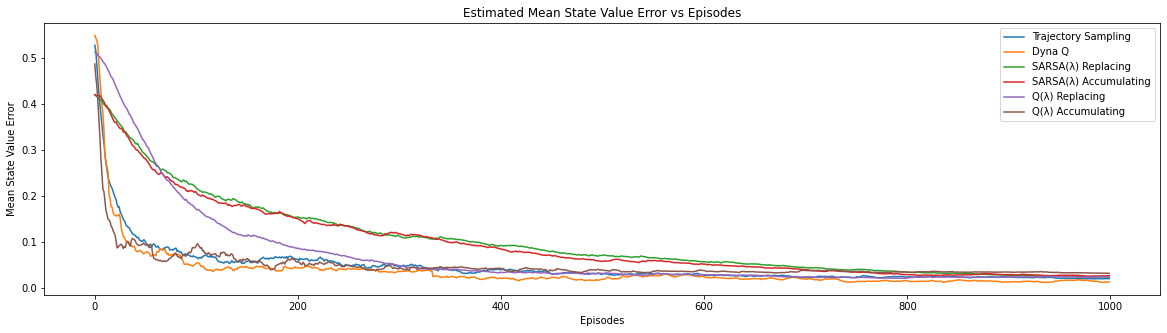

In [271]:
plot_estimate_error_togetherSECOND(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=1000)

100%|██████████| 5/5 [00:00<00:00, 319.93it/s]


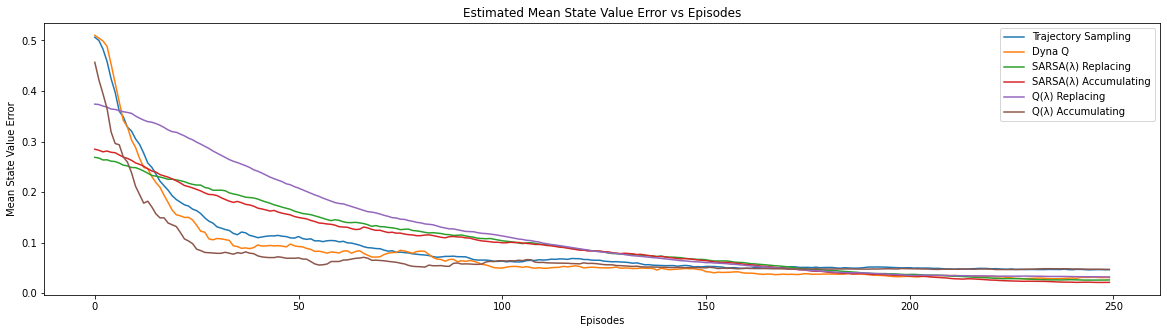

In [272]:
plot_estimate_error_togetherSECOND(instances=5, maxEpisodes=50, maxSteps=50, noEpisodes=250)

### Mean State Value Error Comparison